# **Dimmi che tipo di Pokémon sei… e ti dirò che caffè dovresti scegliere! ☕🔍**


In questo progetto esploreremo due mondi che sembrano lontani, ma che nascondono interessanti connessioni. Analizzeremo due dataset molto diversi:


*   🐉 Pokémon: informazioni su tipi, abilità e statistiche di combattimento.
*   ☕ Caffè: dati sensoriali come aroma, acidità, corpo e altri parametri di qualità.



🎯 **Obiettivi del progetto**:


1.   Costruire modelli predittivi che possano:


  *   Classificare i Pokémon in base alle loro caratteristiche.
  *   Prevedere la qualità del caffè utilizzando le proprietà sensoriali.


2.   Esplorare il Transfer Learning:


  *   Il transfer learning permette di applicare conoscenze apprese su un dominio (es. Pokémon) per affrontare compiti in un dominio diverso (es. caffè).
  *   Dimostreremo come un modello addestrato su un dominio possa essere riutilizzato per migliorare le performance in un altro.

🔍 **Cosa ci insegnerà questa combinazione?**

Anche se Pokémon e caffè sembrano mondi separati, la sfida è capire se un modello, che ha imparato a riconoscere pattern nei dati dei Pokémon, possa essere utile anche per fare previsioni sulla qualità del caffè e viceversa.


# Importazione delle Librerie 📚


Prima di esplorare mondi fantastici, prepariamo gli strumenti! Qui importiamo tutto il necessario per la nostra avventura


In [2]:
# Import di base e librerie standard
import os
import pickle
import warnings
from collections import Counter

# Download e gestione file
import gdown
import zipfile

# Manipolazione dati e analisi
import numpy as np
import pandas as pd

# Visualizzazione dati
import matplotlib.pyplot as plt
import seaborn as sns

# Integrazione con Google Colab
from google.colab import drive

# Machine Learning - Selezione modelli e valutazione
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
    RandomizedSearchCV,
    GridSearchCV
)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# Preprocessing dati
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder
)
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel

# Modelli e ensemble
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingClassifier
)
from sklearn.cluster import KMeans
from sklearn.base import clone

# Gestione dati sbilanciati
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Framework di gradient boosting
from xgboost import XGBClassifier
import lightgbm as lgbm

# Distribuzioni statistiche
from scipy.stats import randint, uniform

# PREPARAZZIONE DEI DATI

È tempo di preparare i nostri dati! In questa sezione, scaricheremo i dataset di Pokémon e Caffè, li estrarremo e daremo un'occhiata alla loro struttura.




**IMPORT DEI DATASET 📥**


* Caricamento il dataset Pokemon: https://www.kaggle.com/datasets/abcsds/pokemon







In [3]:
file_id_Pokemon="1Y6IS9HUsgUGR9nSKBvD74UFaq_MVmvcJ"
url_Pokemon = f"https://drive.google.com/uc?id={file_id_Pokemon}"
output_Pokemon = 'Archive_Pokemon.zip'

# Scarica il file
gdown.download(url_Pokemon, output_Pokemon, quiet=False)

# Estrai i contenuti
with zipfile.ZipFile(output_Pokemon, 'r') as zipf:
    zipf.extractall("/content/Archive_Pokemon")
!ls /content/Archive_Pokemon

# Specifica la directory in cui si trovano i file
directory = '/content/Archive_Pokemon/data'

Downloading...
From: https://drive.google.com/uc?id=1Y6IS9HUsgUGR9nSKBvD74UFaq_MVmvcJ
To: /content/Archive_Pokemon.zip
100%|██████████| 15.2k/15.2k [00:00<00:00, 26.9MB/s]

Pokemon.csv


*   Caricamento il dataset Caffè ☕: https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi


In [4]:
file_id_caffe="1sEq9BMRZI-6hYB_cGjV_Y1svg-FN85gb"
url_caffe = f"https://drive.google.com/uc?id={file_id_caffe}"
output_caffe = 'Archive_caffe.zip'

# Scarica il file
gdown.download(url_caffe, output_caffe, quiet=False)

# Estrai i contenuti
with zipfile.ZipFile(output_caffe, 'r') as zipf:
    zipf.extractall("/content/Archive_caffe")
!ls /content/Archive_caffe

# Specifica la directory in cui si trovano i file
directory = '/content/Archive_caffe/data'

Downloading...
From: https://drive.google.com/uc?id=1sEq9BMRZI-6hYB_cGjV_Y1svg-FN85gb
To: /content/Archive_caffe.zip
100%|██████████| 260k/260k [00:00<00:00, 4.98MB/s]

arabica_data_cleaned.csv  merged_data_cleaned.csv  robusta_data_cleaned.csv


⬇️ Caricamento dei due Dataset in DataFrame e visualizzazione delle prime righe, della struttura e delle informazioni statistiche 📊

In [5]:
# Carica il dataset dei Pokémon (file CSV)
pokemon_file = '/content/Archive_Pokemon/Pokemon.csv'

# Carica i dati in un DataFrame
df_pokemon = pd.read_csv(pokemon_file)

# Visualizza le prime righe del dataset Pokémon
print("\nPrime righe del dataset Pokémon:")
print(df_pokemon.head())

# Verifica la struttura del dataset (numero di righe, colonne, e tipi di dati)
print("\nStruttura del dataset Pokémon:")
print(df_pokemon.info())

print("\nDescrizione del dataset Pokémon: ")
print(df_pokemon.describe())

# Carica il dataset del caffè (file CSV)
merged_file = '/content/Archive_caffe/merged_data_cleaned.csv'


# Carica i dati in DataFrame
df_merged = pd.read_csv(merged_file)


print("\nPrime righe del dataset Merged:")
print(df_merged.head())

print("\nStruttura del dataset Merged:")
print(df_merged.info())

print("\nDescrizione del dataset Merged:")
print(df_merged.describe())



Prime righe del dataset Pokémon:
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  

Struttura del dataset Pokémon:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      -------------- 

**Dataset Pokémon:**

Il dataset risulta ben strutturato con 800 entry complete.

La presenza del campo Type 2 solo per metà dei Pokémon suggerisce che questa feature potrebbe essere opzionale nell'analisi.

I valori estremi in HP (max 255) meritano verifica - potrebbero essere legati a Pokémon particolari come Blissey.



---



**Dataset Caffè**

Metriche sensoriali complete (Aroma, Flavor, etc.) e ben distribuite (media ~7.5/10)

Total.Cup.Points ottimo come target (range realistico 80-90 per caffè specialty)


# ANALISI ESPLORATIVA - Dataset Pokémon 🔍

Adesso che abbiamo i nostri dati, è tempo di esplorarli! In questa sezione, analizzeremo le variabili nel dataset Pokémon per capire meglio le loro caratteristiche e relazioni.


⬇️ Visualizzazione della distribuzione delle variabili numeriche tramite istogrammi. 📊





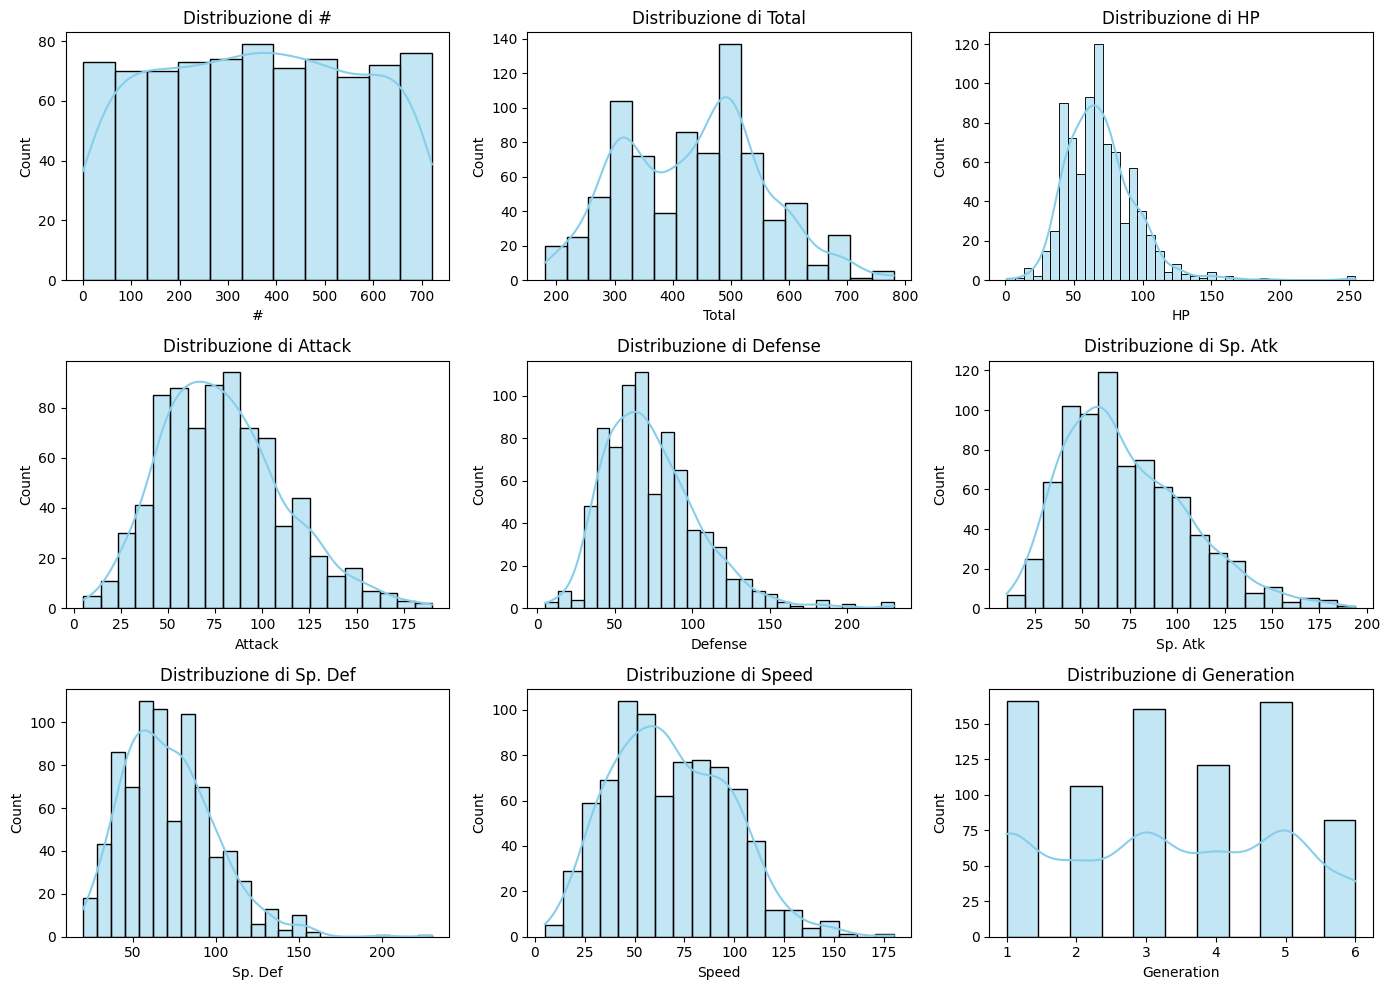

In [6]:
# Seleziona solo le colonne numeriche
numerical_columns = df_pokemon.select_dtypes(include=['float64', 'int64']).columns

# Crea un grafico a istogrammi per ciascuna variabile numerica
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Creazione di una griglia di sottotrame
    sns.histplot(df_pokemon[column], kde=True, color='skyblue')
    plt.title(f'Distribuzione di {column}')
    plt.tight_layout()

plt.show()



*  Distribuzione del numero identificativo (#):

  La distribuzione è pressoché uniforme, indicando che i Pokémon sono numerati in modo consecutivo senza grandi salti.

*  Distribuzione del punteggio totale (Total):

  La distribuzione è multimodale, suggerendo la presenza di più gruppi distinti di Pokémon (es. forme base, evoluzioni, leggendari).

*   Distribuzione degli HP:

  Mostra una distribuzione asimmetrica verso destra (right-skewed), con la maggior parte dei Pokémon che ha HP relativamente bassi e pochi con HP molto alti.

*   Distribuzione di Attack e Defense:

  Entrambe le distribuzioni sono approssimativamente normali, ma con una leggera asimmetria verso destra. Ciò indica che la maggior parte dei Pokémon ha valori medi, mentre i valori molto alti sono rari.

*   Distribuzione di Sp. Atk e Sp. Def:

  Simile ai valori fisici, ma con maggiore variabilità, specialmente per Sp. Atk. Alcuni Pokémon hanno valori molto elevati, indicando specializzazione nell’attacco speciale.

*   Distribuzione della Speed:

  Anche questa è asimmetrica verso destra. Molti Pokémon sono relativamente lenti, con pochi molto veloci.

*   Distribuzione della Generation:

  I conteggi sono ben distribuiti tra le generazioni, ma non perfettamente uniformi: alcune generazioni hanno introdotto più Pokémon di altre.





⬇️ Analisi delle correlazioni tra le variabili numeriche con una heatmap.

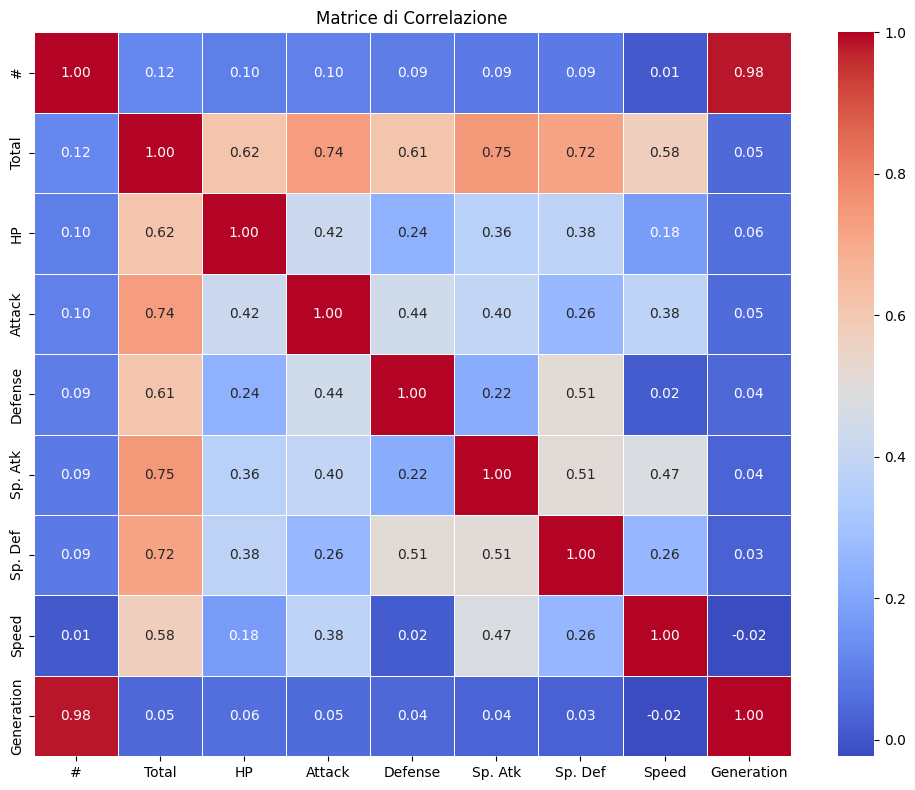

In [7]:
# Calcola la matrice di correlazione
correlation_matrix = df_pokemon[numerical_columns].corr()

# Visualizza la heatmap della correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione')
plt.tight_layout()
plt.show()


*   Total e le altre statistiche:

  La variabile Total ha una forte correlazione positiva con quasi tutte le altre statistiche (soprattutto con Sp. Atk – 0.75, Attack – 0.74, e Sp. Def – 0.72), il che è atteso, poiché Total è la somma di queste componenti.


*   Correlazioni tra statistiche offensive e difensive:

  Le correlazioni tra Attack, Defense e Sp. Atk sono moderate, suggerendo che i Pokémon specializzati in attacco fisico non sono necessariamente forti in attacco speciale o difesa, ma esistono alcune sovrapposizioni.


*   Sp. Def ha una correlazione moderata sia con Defense (0.51) che con Sp. Atk (0.51), indicando che Pokémon con una buona difesa speciale tendono anche ad avere buone difese generali.


*  Speed e le altre variabili:

  Speed mostra una correlazione piuttosto bassa con la maggior parte delle altre statistiche, segnalando che la velocità tende a essere indipendente rispetto ad attacco o difesa.


*   HP e le altre statistiche:

  HP ha una correlazione moderata con Total (0.62), ma debole con le altre, indicando che i Pokémon con molti HP non sono necessariamente più forti in attacco o difesa.


*   n# e Generation:

  Il numero identificativo del Pokémon (#) è fortemente correlato con Generation (0.98), come atteso, poiché i Pokémon sono numerati in ordine di introduzione.



⬇️ Identificazione di outlier tramite boxplot.

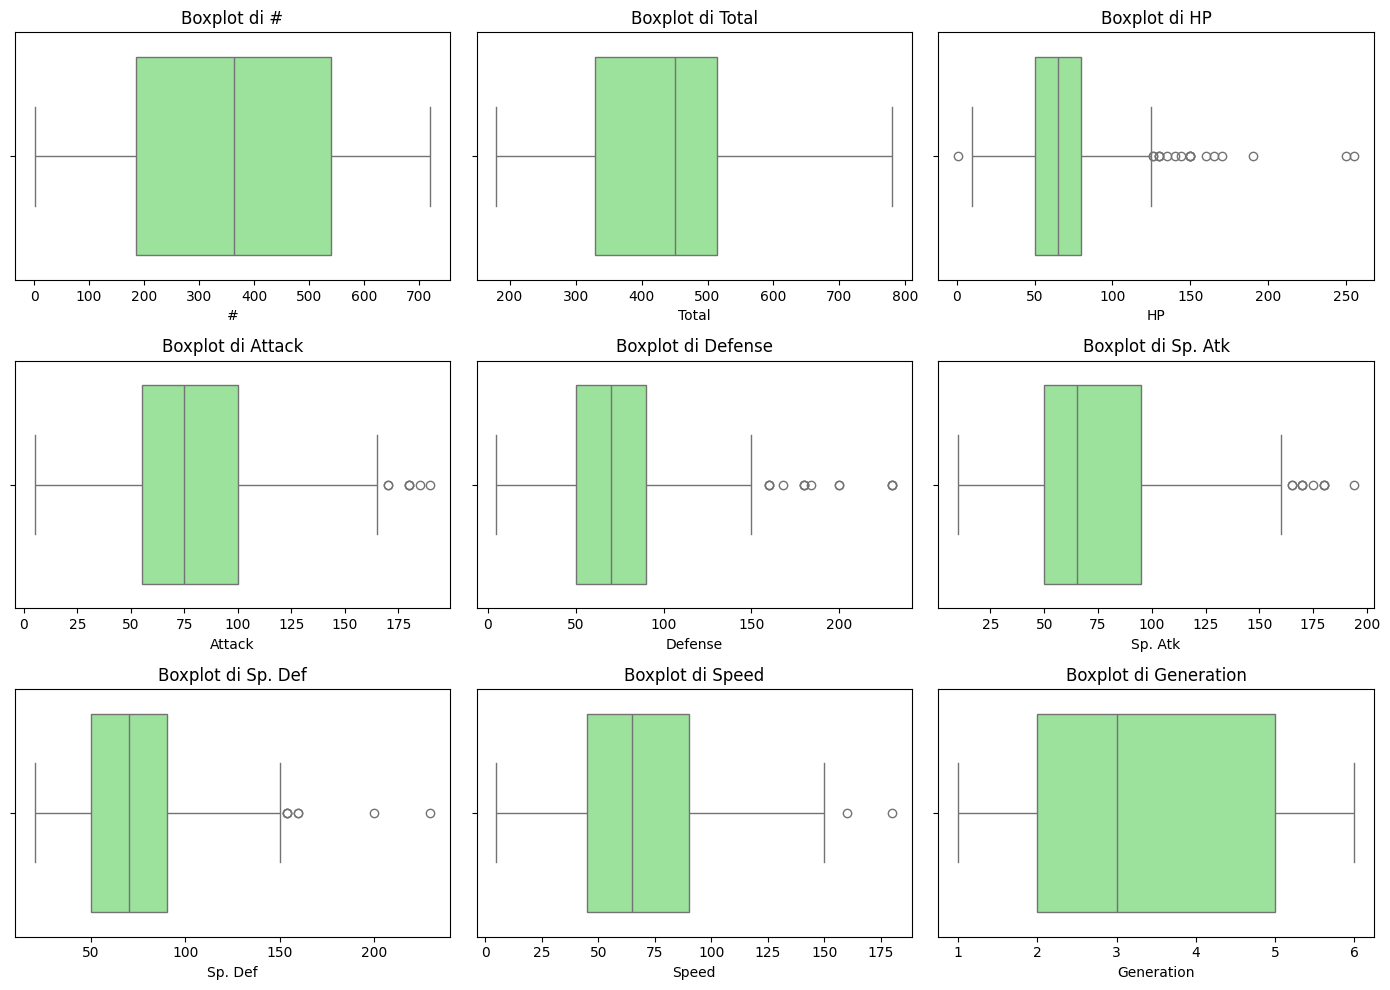

In [8]:
# Crea boxplot per ciascuna variabile numerica
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_pokemon[column], color='lightgreen')
    plt.title(f'Boxplot di {column}')
    plt.tight_layout()

plt.show()


*  Presenza di outlier:

  Diverse variabili, come HP, Attack, Defense, Sp. Atk, Sp. Def e Speed, mostrano numerosi outlier sulla destra (valori molto elevati), indicativi di Pokémon eccezionalmente forti in quella statistica (es. leggendari o forme evolute particolari).


*   Distribuzione asimmetrica:

  La maggior parte delle distribuzioni è leggermente asimmetrica verso destra, con mediana spostata verso sinistra e una coda più lunga a destra, coerente con quanto visto negli istogrammi.


*   Range e dispersione:
  Le statistiche come Attack, Defense e Sp. Atk mostrano una maggiore variabilità, con un range interquartile ampio e molti valori estremi.


*   Variabili come Generation e # hanno distribuzioni più regolari e prive di outlier, come previsto.

*   Simmetria e centralità:
  
  Variabili come Total e Speed mostrano distribuzioni più centrali, ma comunque con outlier a destra, suggerendo che ci sono pochi Pokémon con valori eccezionalmente alti.

⬇️ Studio della distribuzione dei tipi primari e secondari dei Pokémon con grafici a barre.

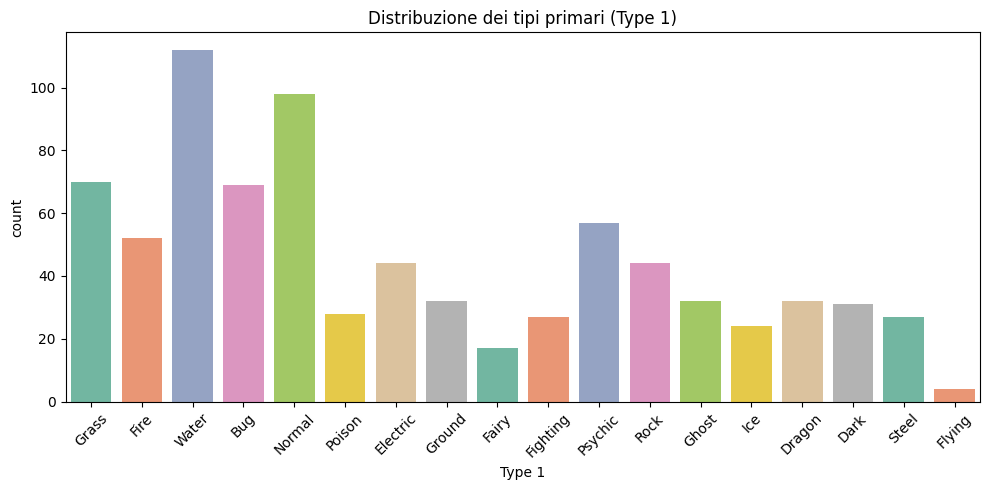

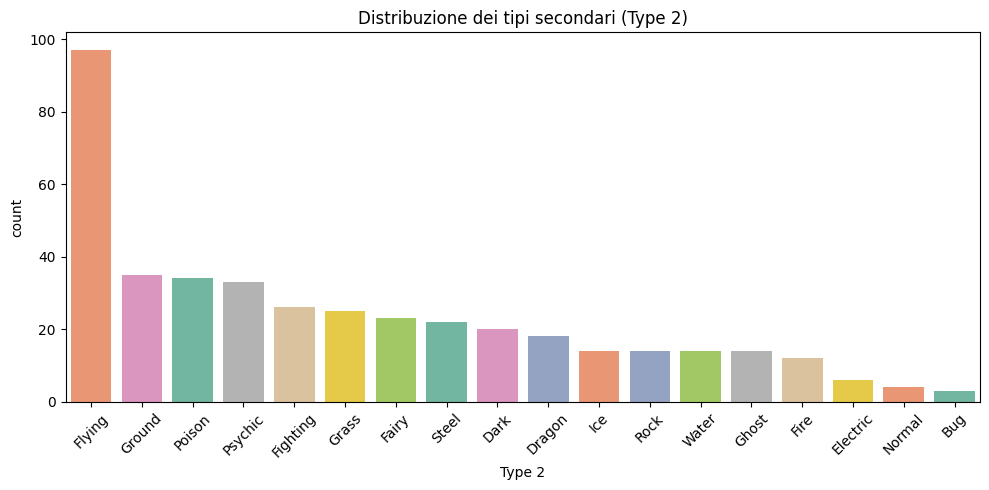

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizza la distribuzione di 'Type 1' (Tipo primario) con il nuovo approccio
plt.figure(figsize=(10, 5))
sns.countplot(data=df_pokemon, x='Type 1', hue='Type 1', palette='Set2')
plt.title('Distribuzione dei tipi primari (Type 1)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualizza la distribuzione di 'Type 2' (Tipo secondario), includendo anche i NaN
plt.figure(figsize=(10, 5))
sns.countplot(data=df_pokemon, x='Type 2', hue='Type 2', palette='Set2', order=df_pokemon['Type 2'].value_counts().index,  legend=False)
plt.title('Distribuzione dei tipi secondari (Type 2)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Analisi Esplorativa - Dataset Caffè ☕️

Ora è il momento di esplorare il nostro secondo dataset: il caffè! Analizzeremo le variabili sensoriali e la loro correlazione con il punteggio finale.

⬇️ Distribuzione delle variabili sensoriali (es. aroma, acidità) tramite istogrammi.








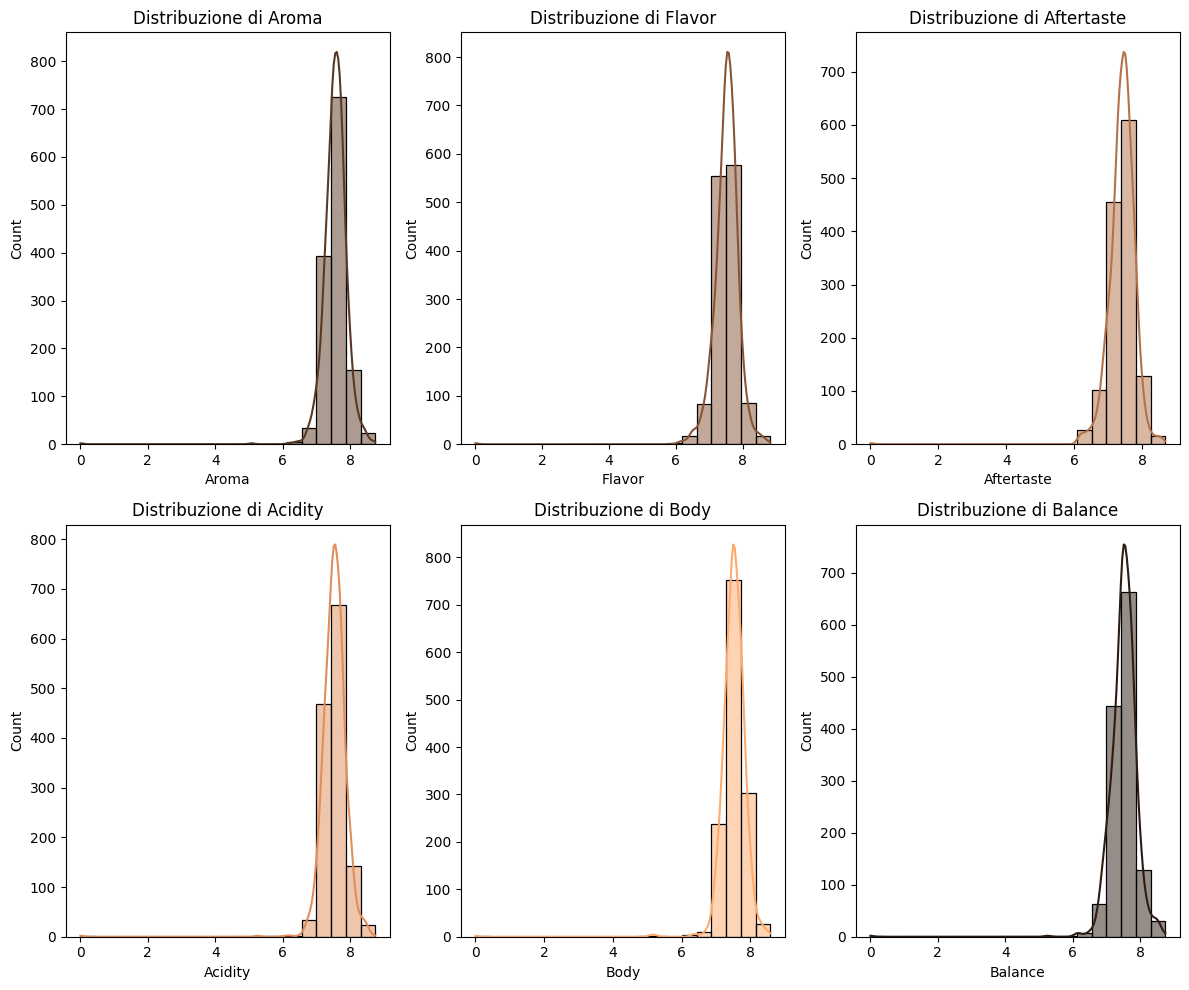

In [10]:
# Carica il dataset del caffè
df_caffe = pd.read_csv('/content/Archive_caffe/merged_data_cleaned.csv')

# Variabili sensoriali
sensorial_columns = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']

# Distribuzione delle variabili sensoriali (istogrammi)
plt.figure(figsize=(12, 10))
brown_palette = sns.color_palette("copper", n_colors=len(sensorial_columns))  # Definisci la palette marrone

for i, col in enumerate(sensorial_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_caffe[col], kde=True, color=brown_palette[i % len(brown_palette)], bins=20)
    plt.title(f'Distribuzione di {col}')
plt.tight_layout()
plt.show()


*   Distribuzione di Aroma:

  La distribuzione è approssimativamente normale, con un picco centrale ben definito. Ciò suggerisce una certa uniformità nelle valutazioni, senza punteggi estremamente bassi o alti prevalenti.

   

*   Distribuzione di Flavor:

  Anche in questo caso, la distribuzione è normale, ma con una leggera asimmetria verso destra. Alcuni campioni potrebbero essere stati valutati con punteggi più elevati, indicando una percezione particolarmente positiva del gusto.  

*   Distribuzione di Aftertaste:

  La distribuzione mostra una coda leggermente più lunga verso sinistra, suggerendo che alcuni campioni potrebbero aver ricevuto valutazioni più basse per il retrogusto, forse a causa di caratteristiche meno persistenti o meno gradevoli.

    

*  Distribuzione di Acidity:  
Presenta una distribuzione quasi simmetrica, ma con una variabilità leggermente maggiore rispetto ad altre variabili. Alcuni caffè potrebbero essere stati percepiti come più acidi, riflettendo differenze significative tra i campioni.  

* Distribuzione di Body:

  La distribuzione è normale, con una concentrazione di punteggi nella fascia media. Tuttavia, la coda destra è leggermente più pronunciata, indicando che alcuni caffè sono stati valutati come particolarmente corposi.

   

* Distribuzione di Balance:

  Mostra una distribuzione bilanciata con un picco centrale marcato. Questo suggerisce che la maggior parte dei caffè ha un equilibrio tra le diverse caratteristiche, con pochi casi estremi.

⬇️ Matrice di correlazione tra le variabili sensoriali e il punteggio totale di qualità.

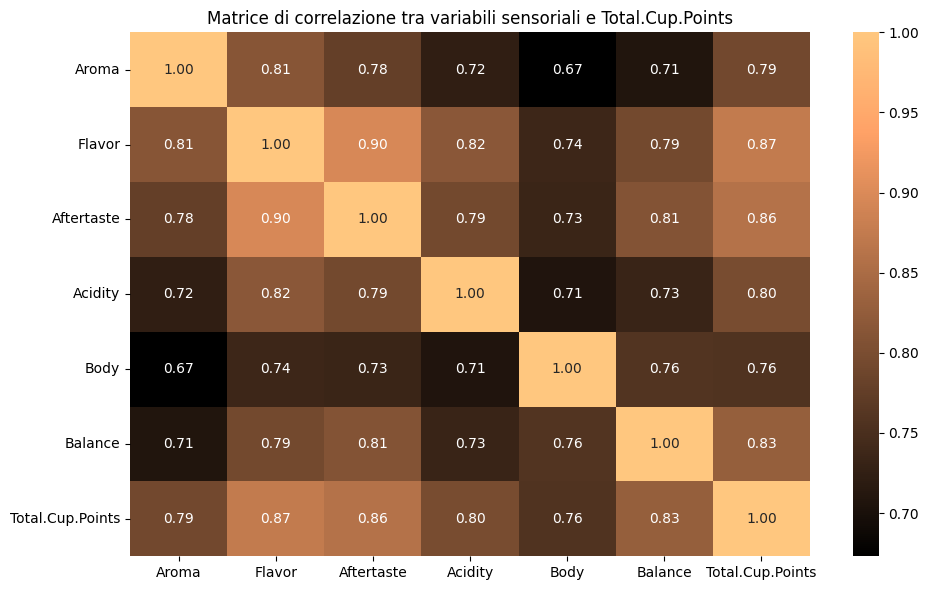

In [11]:
# Correlazione tra variabili sensoriali e il punteggio finale (Total.Cup.Points)
plt.figure(figsize=(10, 6))
sns.heatmap(df_caffe[sensorial_columns + ['Total.Cup.Points']].corr(), annot=True, cmap='copper', fmt='.2f')
plt.title('Matrice di correlazione tra variabili sensoriali e Total.Cup.Points')
plt.tight_layout()
plt.show()


* Flavor e Aftertaste mostrano la correlazione più forte con Total.Cup.Points (rispettivamente 0.87 e 0.86), indicando che gusto e retrogusto sono i fattori che influenzano maggiormente il punteggio finale del caffè.

* Balance ha un'elevata correlazione (0.83), suggerendo che l'equilibrio tra le caratteristiche sensoriali è un aspetto chiave nella valutazione complessiva.

* Aroma, sebbene importante (0.79), ha un impatto leggermente inferiore rispetto a Flavor e Aftertaste, ma rimane un fattore significativo.

* Acidity e Body presentano correlazioni più moderate (0.80 e 0.76), indicando che, pur contribuendo al punteggio, hanno un peso relativo minore rispetto ad altre variabili.

**Correlazioni tra attributi sensoriali:**

* Flavor e Aftertaste sono fortemente correlati (0.90), il che è logico poiché il retrogusto è spesso una continuazione della percezione del gusto.

* Balance è ben correlato con Aftertaste e Flavor (entrambi 0.81), confermando che un caffè bilanciato tende a offrire un'esperienza gustativa armoniosa.

* Body e Aroma hanno la correlazione più debole tra gli attributi (0.67), suggerendo che la corposità non dipende direttamente dall'intensità aromatica.

⬇️ Identificazione di outlier nelle variabili sensoriali con boxplot.

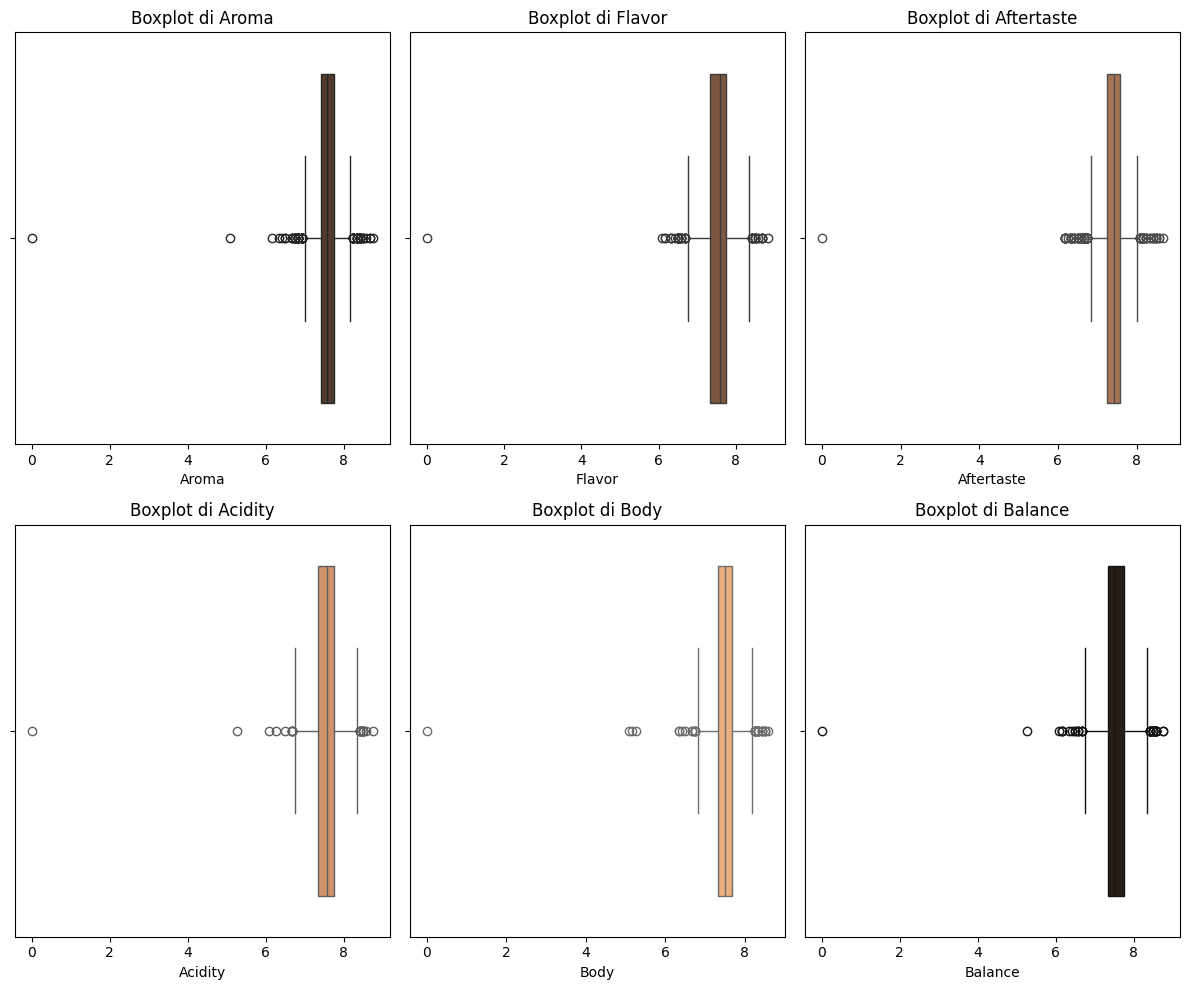

In [12]:
# Variabili sensoriali
sensorial_columns = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']

# Definisci una palette marrone
brown_palette = sns.color_palette("copper", n_colors=len(sensorial_columns))

# Verifica la presenza di outlier nelle variabili sensoriali (boxplot)
plt.figure(figsize=(12, 10))
for i, col in enumerate(sensorial_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_caffe, x=col, color=brown_palette[i % len(brown_palette)])
    plt.title(f'Boxplot di {col}')
plt.tight_layout()
plt.show()


* Presenza di outlier:

  Tutte le variabili sensoriali (Aroma, Flavor, Aftertaste, Acidity, Body, Balance) presentano alcuni outlier, principalmente nella fascia alta dei punteggi. Questo indica la presenza di caffè eccezionalmente ben valutati per queste caratteristiche, probabilmente corrispondenti a lotti di alta qualità o particolarmente pregiati.

  Gli outlier sono più frequenti in Flavor e Aftertaste, suggerendo che alcuni campioni si distinguono in modo significativo per gusto e persistenza.

* Distribuzione e simmetria:

  Aroma e Balance mostrano distribuzioni relativamente simmetriche, con la mediana centrale e i quartili ben bilanciati.

  Flavor, Aftertaste e Acidity presentano una leggera asimmetria positiva (coda più lunga verso l'alto), indicando che la maggior parte dei caffè ha valutazioni nella media, con alcuni casi eccezionalmente alti.

  Body ha una distribuzione più compressa, con meno variabilità rispetto alle altre variabili, ma comunque con qualche outlier nella fascia alta.


* Range e variabilità:

  Flavor e Aftertaste mostrano la maggiore dispersione (range interquartile più ampio), riflettendo una diversità più marcata nelle valutazioni di gusto e retrogusto.

  Body è la variabile con la minore variabilità, suggerendo che i valutatori tendono a concordare maggiormente su questo attributo.

⬇️ Distribuzione delle specie di caffè e dei paesi di origine con grafici a barre.

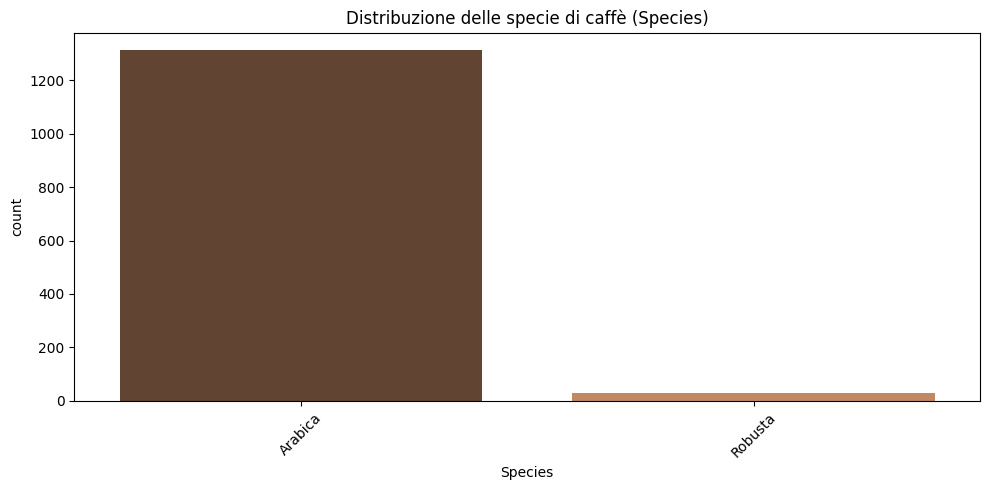

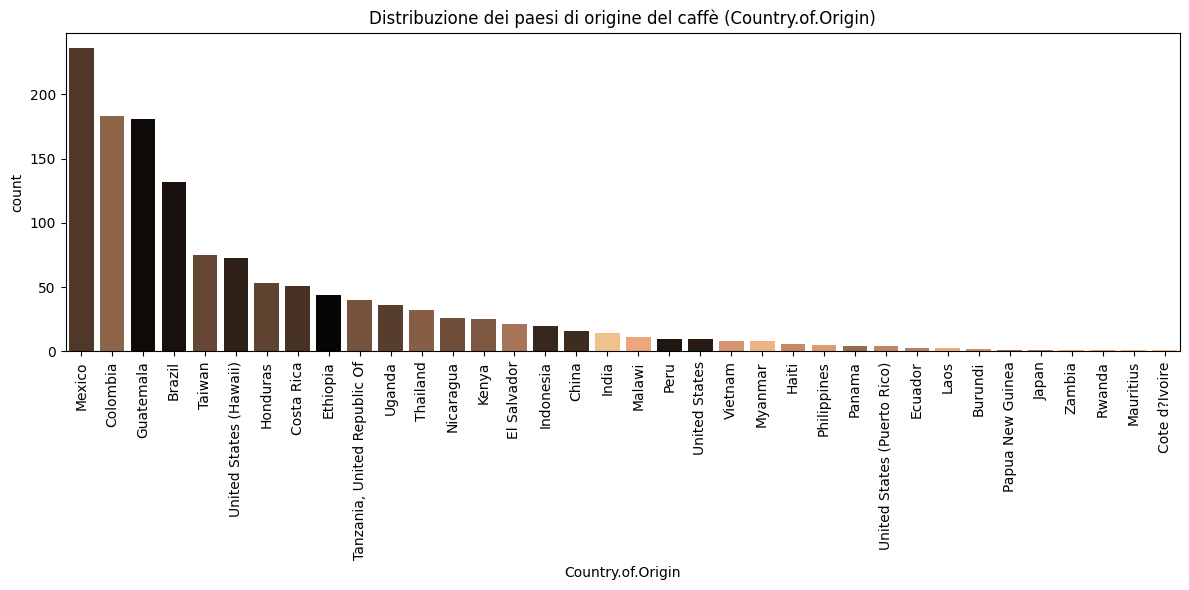

In [13]:
# Distribuzione delle categorie nelle colonne 'Species' e 'Country.of.Origin'

# Distribuzione di 'Species'
plt.figure(figsize=(10, 5))
sns.countplot(data=df_caffe, x='Species', hue='Species', palette='copper', legend=False)
plt.title('Distribuzione delle specie di caffè (Species)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribuzione di 'Country.of.Origin' (con l'uso corretto di hue e rotazione maggiore delle etichette)
plt.figure(figsize=(12, 6))  # Aumenta la dimensione della figura se necessario
sns.countplot(data=df_caffe, x='Country.of.Origin', hue='Country.of.Origin', palette='copper', legend=False, order=df_caffe['Country.of.Origin'].value_counts().index)
plt.title('Distribuzione dei paesi di origine del caffè (Country.of.Origin)')
plt.xticks(rotation=90)  # Ruota le etichette di 90 gradi per migliorare la leggibilità
plt.tight_layout()
plt.show()


# Feature Engineering - Dataset Pokémon ⚙️

In questa sezione, ci dedichiamo all'ingegneria delle feature per il dataset Pokémon. Creeremo nuove caratteristiche che ci aiuteranno a migliorare i nostri modelli.

⬇️

Definizione di una funzione per l'ingegneria delle feature, inclusa la standardizzazione e il clustering con KMeans per creare categorie automatiche.

Applicazione della funzione al dataset Pokémon e bilanciamento delle classi con SMOTE.

In [14]:
def engineer_features(df):

    df_engineered = df.copy()

    # Estrazione delle feature numeriche
    features = df_engineered.drop(columns=['#', 'Name', 'Type 1', 'Type 2', 'Legendary'], errors='ignore')
    numeric_features = features.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Standardizzazione delle feature numeriche
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features[numeric_features])

    # Clustering con KMeans per creare 5 categorie
    kmeans = KMeans(n_clusters=5, random_state=42)
    df_engineered['Auto_Category'] = kmeans.fit_predict(X_scaled)

    # Bilanciamento delle classi con SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, df_engineered['Auto_Category'])

    # Crea il DataFrame bilanciato
    df_engineered_resampled = pd.DataFrame(X_resampled, columns=numeric_features)
    df_engineered_resampled['Auto_Category'] = y_resampled

    return df_engineered_resampled

df_processed = engineer_features(df_pokemon)


* Preparare i dati per l'analisi/modellazione

  Rimuove colonne non numeriche (come nomi, tipi e leggendari) per lavorare solo su feature quantitative.

  Standardizza i dati (con StandardScaler) per garantire che tutte le variabili abbiano la stessa scala (media=0, deviazione standard=1), essenziale per algoritmi basati su distanze (es. clustering).

* Creare nuove feature utili

  Applica il clustering K-means (con 5 cluster) per generare una nuova colonna categorica (Auto_Category). Questa suddivide i Pokémon in gruppi omogenei in base alle loro statistiche (attacco, difesa, ecc.), rivelando pattern nascosti (es. "tank", "attaccanti veloci", "tuttofare").

* Risolvere problemi di bilanciamento delle classi

  Usa SMOTE (Synthetic Minority Over-sampling Technique) per bilanciare automaticamente i cluster creati. Questo evita che modelli predittivi siano sbilanciati verso categorie dominanti.

# Preparazione dei Dati per l'Addestramento 🏋️

Prepariamo i dati per l'addestramento dei modelli! In questa sezione, suddivideremo i dati in set di allenamento, validazione e test.


⬇️

suddivisione dei dati in set di allenamento, validazione e test


*   70% per l'addestramento
*   15% per la validazione
*   15% per il test






In [15]:
# Preparazione X e y
columns_to_exclude = ['#', 'Name', 'Type 1', 'Type 2', 'Legendary', 'Auto_Category']
X = df_processed.drop(columns_to_exclude, axis=1, errors='ignore')
y = df_processed['Auto_Category']  # Usa la nuova categoria ottenuta tramite clustering


In [16]:
# Split train/val/test stratificato
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.15, random_state=42, stratify=y_train_val
)

print(f"\nDimensioni dei set:")
print(f"Training: {X_train.shape[0]} campioni")
print(f"Validation: {X_val.shape[0]} campioni")
print(f"Test: {X_test.shape[0]} campioni")




Dimensioni dei set:
Training: 710 campioni
Validation: 126 campioni
Test: 209 campioni


⬇️ Preprocessing delle feature numeriche e categoriche con ColumnTransformer e StandardScaler.

In [17]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nPreprocessing:")
print(f"Colonne numeriche: {len(numeric_cols)}")
print(f"Colonne categoriche: {len(categorical_cols)}")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols) if categorical_cols else ('cat', 'passthrough', [])
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)




Preprocessing:
Colonne numeriche: 8
Colonne categoriche: 0


# Training dei Modelli - Pokémon 🏆

I Pokémon sono pronti a combattere! Addestriamo i modelli per classificarli.

 ⬇️

 Creazione di un ensemble di modelli utilizzando Random Forest e XGBoost e training il modello sui dati di allenamento.


Ottimizzazione degli iperparametri per Random Forest e XGBoost con RandomizedSearchCV.


Creazione di un ensemble con VotingClassifier per combinare i modelli.



In [18]:
# Addestramento modelli Pokemon con ottimizzazione iperparametri
print("\nAddestramento dei modelli...")

# Definizione iperparametri ottimali con ricerca randomizzata
rf_params = {
    'n_estimators': randint(100, 200),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

xgb_params = {
    'n_estimators': randint(100, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

# Creazione modelli base
rf_base = RandomForestClassifier(random_state=42)
xgb_base = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Ottimizzazione Random Forest
rf_search = RandomizedSearchCV(
    rf_base,
    param_distributions=rf_params,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
rf_search.fit(X_train_processed, y_train)
rf_model = rf_search.best_estimator_
print(f"Migliori parametri RF: {rf_search.best_params_}")

# Ottimizzazione XGBoost
xgb_search = RandomizedSearchCV(
    xgb_base,
    param_distributions=xgb_params,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
xgb_search.fit(X_train_processed, y_train)
xgb_model = xgb_search.best_estimator_
print(f"Migliori parametri XGB: {xgb_search.best_params_}")

# Creazione dell'ensemble ottimizzato
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)],
    voting='soft'  # Usa le probabilità, meglio per F1 score
)
ensemble_model.fit(X_train_processed, y_train)


Addestramento dei modelli...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Migliori parametri RF: {'max_depth': 29, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:42:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Migliori parametri XGB: {'colsample_bytree': np.float64(0.6053059844639466), 'learning_rate': np.float64(0.19844035113697056), 'max_depth': 8, 'n_estimators': 108, 'subsample': np.float64(0.6063865008880857)}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:42:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=29,
                                                     min_samples_split=4,
                                                     n_estimators=150,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=np.float64(0.6053059844639466),
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            ev...
                                            interaction_constraints=None,
                                            learning_rate=np.float64(0.19844035113697056),
                                            max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=8,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=108, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 voting='soft')

Definizione degli Iperparametri Ottimali:

  Prima di addestrare i modelli, vengono definiti dei range di iperparametri da testare:

  * Per Random Forest (rf_params):

  n_estimators: Numero di alberi nel forest (100-200).

  max_depth: Profondità massima degli alberi (10-30).

  min_samples_split: Minimo numero di campioni per dividere un nodo (2-10).

  min_samples_leaf: Minimo numero di campioni in una foglia (1-4).

  * Per XGBoost (xgb_params):

  n_estimators: Numero di alberi (100-200).

  max_depth: Profondità massima (3-10).

  learning_rate: Tasso di apprendimento (0.01-0.2).

  subsample e colsample_bytree: Frazioni di righe/colonne da campionare (0.6-1.0).

RandomizedSearchCV esegue una ricerca casuale (più efficiente di una griglia completa) per trovare la combinazione migliore.



---



Ottimizzazione dei Modelli

Vengono creati due modelli base (RandomForestClassifier e XGBClassifier) e ottimizzati con:

* RandomizedSearchCV (su 10 iterazioni e 3-fold CV).

* n_jobs=-1 (parallelizza su tutti i core della CPU).

* verbose=1 (mostra i progressi in tempo reale).

---



Ensemble Voting Classifier

Dopo l'ottimizzazione, i due modelli sono combinati in un ensemble con:

* VotingClassifier (voto "soft" → usa le probabilità predette).

Migliora l'accuratezza sfruttando i punti di forza di entrambi gli algoritmi e riduce il rischio di overfitting rispetto all'uso di un singolo modello.

---

Scelta del Voting="soft"

voting='soft' (anziché 'hard') permette di:

* Usare le probabilità invece delle classi predette.

* Migliorare l'F1-score (metrica importante per dataset sbilanciati).

# Valutazione dei Modelli - Pokémon 📊

È tempo di vedere come se la cava il nostro modello! 🕵️‍♂️

Valutiamo le performance del nostro modello! In questa sezione, analizzeremo come si comporta il nostro modello sui set di validazione e test.

 Scopriamo se i nostri Pokémon hanno vinto!🥇

⬇️

Definizione di una funzione per valutare accuratezza, F1 score e matrice di confusione.

Valutazione dell'ensemble sui set di validation e test.


=== VALUTAZIONE ENSEMBLE ===

Performance sul set Validation:
Accuracy: 0.9603
F1 Score (weighted): 0.9603

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.96      0.92      0.94        26
           2       0.92      0.92      0.92        25
           3       1.00      1.00      1.00        25
           4       0.93      1.00      0.96        25

    accuracy                           0.96       126
   macro avg       0.96      0.96      0.96       126
weighted avg       0.96      0.96      0.96       126



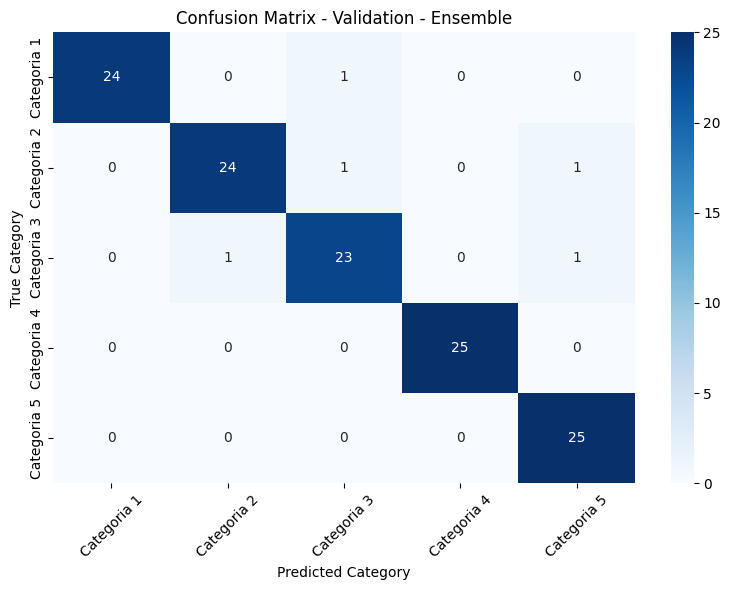


Performance sul set Test:
Accuracy: 0.9713
F1 Score (weighted): 0.9713

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.98      1.00      0.99        41
           2       0.95      0.95      0.95        42
           3       0.98      0.95      0.96        42
           4       1.00      0.98      0.99        42

    accuracy                           0.97       209
   macro avg       0.97      0.97      0.97       209
weighted avg       0.97      0.97      0.97       209



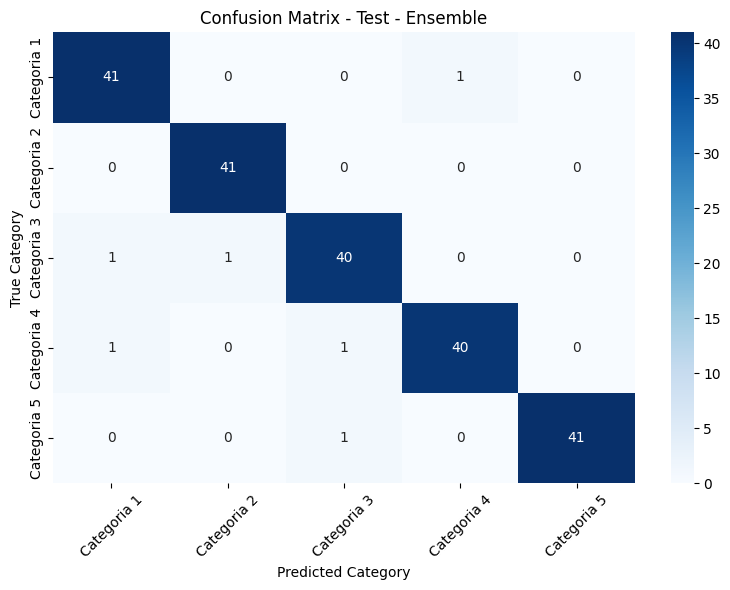

In [19]:
# Funzione di valutazione dei modelli
def evaluate_model(model, X, y, dataset_name, class_labels=None):

    # Valutazione del modello
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='weighted')

    # Stampa dei risultati
    print(f"\nPerformance sul set {dataset_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y, y_pred, zero_division=0))

    # Visualizzazione della matrice di confusione
    if class_labels is None:
        # Default labels
        class_labels = [f'Categoria {i+1}' for i in range(len(set(y)))]

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)

    # Nome del modello per il titolo
    model_name = model.__class__.__name__
    if hasattr(model, 'estimators_'):
        model_name = "Ensemble"

    plt.title(f'Confusion Matrix - {dataset_name} - {model_name}')
    plt.ylabel('True Category')
    plt.xlabel('Predicted Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return accuracy, f1

# Valutazione dell'ensemble
print("\n=== VALUTAZIONE ENSEMBLE ===")
class_labels = ['Categoria 1', 'Categoria 2', 'Categoria 3', 'Categoria 4', 'Categoria 5']
ensemble_val_acc, ensemble_val_f1 = evaluate_model(ensemble_model, X_val_processed, y_val, "Validation", class_labels)
ensemble_test_acc, ensemble_test_f1 = evaluate_model(ensemble_model, X_test_processed, y_test, "Test", class_labels)


* Accuracy rappresenta la percentuale di campioni correttamente classificati. Ottimi risultati su entrambi i set (> 96%).

* F1 Score (weighted) è la media armonica tra precision e recall, pesata per il numero di elementi per classe. Anche qui, performance eccellenti e bilanciate.

Tutte le classi hanno precision e recall ≥ 0.95, con punte di 1.00. Questo indica un modello molto ben bilanciato, senza evidenti bias verso certe classi.

Il modello ensemble ha generalizzato molto bene, con performance alte sia sul validation che sul test set.

Gli errori sono sporadici e distribuiti, senza una classe sistematicamente problematica.

#  Salvataggio del Modello e Preprocessore - Pokémon 💾

In questa sezione, il miglior modello e il preprocessore vengono salvati per utilizzi futuri. I modelli vengono salvati in file pickle per garantire che possano essere facilmente ricaricati in seguito.

I nostri Pokémon e il loro allenatore sono pronti per il futuro! 🚀


In [20]:
# Salvataggio del miglior modello e del preprocessore
with open('pokemon_best_model_bagging.pkl', 'wb') as f:
    pickle.dump(ensemble_model, f)

with open('pokemon_preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

print("\nIl modello e il preprocessore sono stati salvati con successo!")


Il modello e il preprocessore sono stati salvati con successo!


# Valutazione dell'Importanza delle Feature 📊

In questa sezione, analizziamo l'importanza delle feature utilizzate nel nostro modello. Comprendere quali caratteristiche influenzano maggiormente le previsioni è fondamentale per migliorare i modelli e ottenere intuizioni sui dati.

⬇️

Definizione di una funzione per visualizzare l'importanza delle feature nei modelli addestrati.

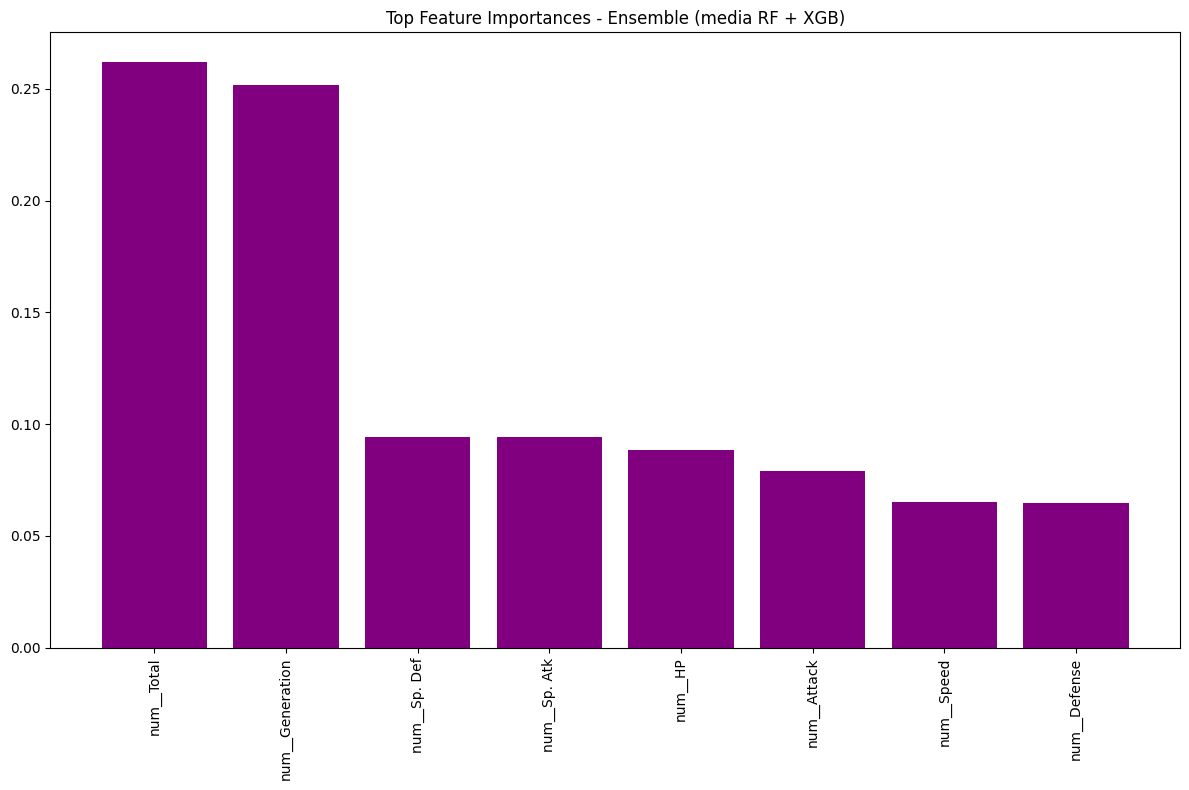

In [21]:
#Visualizzazione delle feature importances e salvataggio del modello
def plot_feature_importances(ensemble_model, preprocessor=None, top_n=8):

    # Estrazione dei modelli dall'ensemble
    rf_model = ensemble_model.named_estimators_['rf']
    xgb_model = ensemble_model.named_estimators_['xgb']

    # Calcola le feature importances
    rf_importances = rf_model.feature_importances_
    xgb_importances = xgb_model.feature_importances_

    # Media delle importances
    avg_importances = (rf_importances + xgb_importances) / 2

    # Ordina per importanza decrescente
    indices = np.argsort(avg_importances)[::-1]

    # Recupera i nomi delle feature
    if preprocessor is not None and hasattr(preprocessor, 'get_feature_names_out'):
        feature_names = preprocessor.get_feature_names_out()
    else:
        feature_names = [f"feature{i}" for i in range(len(avg_importances))]

    # Plot istogramma (top N feature)
    top_n = min(top_n, len(indices))
    plt.figure(figsize=(12, 8))
    plt.title('Top Feature Importances - Ensemble (media RF + XGB)')
    plt.bar(range(top_n), avg_importances[indices][:top_n], color='purple', align='center')
    plt.xticks(range(top_n), [feature_names[i] for i in indices][:top_n], rotation=90)
    plt.tight_layout()
    plt.show()

# Visualizza feature importances
plot_feature_importances(ensemble_model, preprocessor)


# Preprocessing del Dataset Caffè ☕️

Questa sezione si occupa del preprocessing del dataset Caffè, inclusa la creazione di nuove feature e la classificazione per qualità. Vengono calcolati i rapporti sensoriali e il dataset viene suddiviso in set di allenamento, validazione e test, con l'applicazione di one-hot encoding per le variabili categoriche.

 È tempo di dare un punteggio al nostro caffè! 🌟



 ⬇️

 Calcolo dei rapporti sensoriali e creazione di una nuova colonna per la classificazione della qualità nel dataset



In [22]:
# Preparazione dei dati del caffè
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Calcola i rapporti sensoriali
df_merged['acidity_to_body'] = df_merged['Acidity'] / df_merged['Body']
df_merged['flavor_to_aroma'] = df_merged['Flavor'] / df_merged['Aroma']

# Classificazione per qualità
df_merged['quality_class'] = pd.qcut(df_merged['Total.Cup.Points'], q=5, labels=[1, 2, 3, 4, 5])

# Calcolare la distribuzione in percentuale delle classi di qualità
quality_class_counts = df_merged['quality_class'].value_counts(normalize=True) * 100
print("Distribuzione delle classi di qualità (%):")
print(quality_class_counts.round(2))

Distribuzione delle classi di qualità (%):
quality_class
3    21.51
2    20.91
1    20.31
5    19.27
4    18.00
Name: proportion, dtype: float64


Creazione di Nuove Feature Sensoriali

Vengono calcolati due rapporti sensoriali per catturare relazioni tra attributi:

* acidity_to_body = Acidity / Body

  Misura l'equilibrio tra acidità e corpo (es. un valore alto indica un caffè più acido che corposo).

* flavor_to_aroma = Flavor / Aroma

  Confronta l'intensità del gusto rispetto all'aroma (es. un valore basso suggerisce un aroma più pronunciato del sapore).

Queste feature sintetizzano interazioni complesse tra variabili, aiutando i modelli a identificare pattern non evidenti nei dati grezzi.

---

Classificazione della Qualità

La colonna Total.Cup.Points (punteggio totale) viene suddivisa in 5 classi di qualità con pd.qcut:

labels=[1, 2, 3, 4, 5] (dove 1 = qualità più bassa, 5 = più alta).

q=5 divide i dati in quantili uguali, garantendo una distribuzione bilanciata.


---

Trasforma un problema di regressione (prevedere un punteggio continuo) in uno di classificazione (prevedere una categoria di qualità) facilitando l'interpretazione

⬇️

Suddivisione del dataset in training, validation e test set. Verifica delle dimensioni di ciascun set.

In [23]:
# Suddividi i dataset
train_caffe, test_caffe = train_test_split(df_merged, test_size=0.3, random_state=42)
train_caffe, val_caffe = train_test_split(train_caffe, test_size=0.15, random_state=42)

# Verifica la dimensione dei set
print("\nDimensioni dei set Caffè:")
print(f"Set di allenamento: {train_caffe.shape[0]}")
print(f"Set di validazione: {val_caffe.shape[0]}")
print(f"Set di test: {test_caffe.shape[0]}")

# Dataset Caffè - One-hot encoding per le variabili categoriche
caffe_columns = ['Species', 'Country.of.Origin', 'Farm.Name', 'Region', 'Variety',
                'Processing.Method', 'Color', 'Expiration', 'Certification.Body',
                'unit_of_measurement']

# Funzione migliorata per gestire le differenze nelle colonne one-hot tra training e validation/test
def encode_and_align_categories(train_df, val_df, test_df, categorical_columns):
    """
    Esegue one-hot encoding garantendo allineamento delle colonne tra train, val e test
    con prestazioni ottimizzate
    """
    # One-hot encoding sul training set
    train_encoded = pd.get_dummies(train_df[categorical_columns], drop_first=True)

    # Preserva le colonne del training set per val e test
    train_cols = train_encoded.columns

    # Encoding dei set validation e test
    val_encoded = pd.get_dummies(val_df[categorical_columns], drop_first=True)
    test_encoded = pd.get_dummies(test_df[categorical_columns], drop_first=True)

    # Identifica colonne mancanti nei set validation e test
    val_missing = list(set(train_cols) - set(val_encoded.columns))
    test_missing = list(set(train_cols) - set(test_encoded.columns))

    # Crea DataFrame con colonne mancanti (tutte con valore 0)
    if val_missing:
        val_missing_df = pd.DataFrame(0, index=val_encoded.index, columns=val_missing)
        val_encoded = pd.concat([val_encoded, val_missing_df], axis=1)

    if test_missing:
        test_missing_df = pd.DataFrame(0, index=test_encoded.index, columns=test_missing)
        test_encoded = pd.concat([test_encoded, test_missing_df], axis=1)

    # Allinea colonne con il training set
    val_encoded = val_encoded[train_cols]
    test_encoded = test_encoded[train_cols]

    return train_encoded, val_encoded, test_encoded

# Applica encoding allineato
caffe_dummies_train, caffe_dummies_val, caffe_dummies_test = encode_and_align_categories(
    train_caffe, val_caffe, test_caffe, caffe_columns
)

# Uniamo le nuove colonne one-hot con i dataset originali
train_caffe = pd.concat([train_caffe, caffe_dummies_train], axis=1)
val_caffe = pd.concat([val_caffe, caffe_dummies_val], axis=1)
test_caffe = pd.concat([test_caffe, caffe_dummies_test], axis=1)

# Rimuoviamo le colonne originali
train_caffe.drop(caffe_columns, axis=1, inplace=True)
val_caffe.drop(caffe_columns, axis=1, inplace=True)
test_caffe.drop(caffe_columns, axis=1, inplace=True)


Dimensioni dei set Caffè:
Set di allenamento: 796
Set di validazione: 141
Set di test: 402


⬇️

Definizione di una funzione per l'ingegneria delle feature che crea delle nuove colonne che rappresentano rapporti sensoriali e caratteristiche ispirate ai Pokémon.

Creazione delle caratteristiche offensive, difensive, di velocità e speciali, proprio come nel mondo dei Pokémon

Aggiunta di combinazioni più complesse e statistiche totali, per avere un quadro completo.

In [24]:
# Feature engineering per il dataset caffè con mapping esplicito per transfer learning

def engineer_coffee_features(df):

    df_engineered = df.copy()

    # IMPORTANTE: Rimuoviamo Total.Cup.Points per evitare data leakage poiché è direttamente collegato alla classificazione di qualità
    if 'Total.Cup.Points' in df_engineered.columns:
        df_engineered = df_engineered.drop('Total.Cup.Points', axis=1)

    # Rapporti sensoriali base - con controllo divisione per zero
    if 'acidity_to_body' not in df_engineered.columns:
        df_engineered['acidity_to_body'] = df_engineered['Acidity'] / (df_engineered['Body'] + 0.01)

    if 'flavor_to_aroma' not in df_engineered.columns:
        df_engineered['flavor_to_aroma'] = df_engineered['Flavor'] / (df_engineered['Aroma'] + 0.01)

    # MAPPATURA ESPLICITA AI PARAMETRI DI POKEMON:
    # Attack -> Flavor (potenza del sapore)
    # Defense -> Body (resistenza/corpo)
    # Special Attack -> Aroma (potenza speciale)
    # Special Defense -> Balance (resistenza speciale/equilibrio)
    # Speed -> Acidity (velocità/acidità)

    # Caratteristiche offensive (come Attack in Pokémon)
    df_engineered['attack_power'] = df_engineered['Flavor'] * 2.0

    # Caratteristiche difensive (come Defense in Pokémon)
    df_engineered['defense_power'] = df_engineered['Body'] * 2.0

    # Attacchi speciali (come Special Attack in Pokémon)
    df_engineered['special_attack'] = df_engineered['Aroma'] * 2.0

    # Difese speciali (come Special Defense in Pokémon)
    df_engineered['special_defense'] = df_engineered['Balance'] * 2.0

    # Caratteristiche di velocità (come Speed in Pokémon)
    df_engineered['speed'] = df_engineered['Acidity'] * 2.0

    # HP (come Hit Points in Pokémon)
    # Non usare Total.Cup.Points ma solo attributi sensoriali base
    df_engineered['hp'] = (df_engineered[['Aroma', 'Flavor', 'Aftertaste',
                                         'Acidity', 'Body', 'Balance']].sum(axis=1)) / 6 * 10

    # Statistiche totali (come Total Stats in Pokémon)
    df_engineered['total_stats'] = df_engineered[['attack_power', 'defense_power',
                                               'special_attack', 'special_defense',
                                               'speed', 'hp']].sum(axis=1)

    # Rapporto statistiche fisiche/speciali (come in Pokémon)
    df_engineered['physical_ratio'] = (df_engineered['attack_power'] + df_engineered['defense_power']) / \
                                    (df_engineered['special_attack'] + df_engineered['special_defense'] + 0.01)

    # Varianza delle statistiche (come Stat Spread in Pokémon)
    df_engineered['stat_variance'] = df_engineered[['attack_power', 'defense_power',
                                                 'special_attack', 'special_defense',
                                                 'speed', 'hp']].var(axis=1)

    # Combinazioni sinergiche (come Type Advantages in Pokémon)
    df_engineered['physical_synergy'] = df_engineered['attack_power'] * \
                                      df_engineered['defense_power'] / 100

    df_engineered['special_synergy'] = df_engineered['special_attack'] * \
                                     df_engineered['special_defense'] / 100

    # Nuove feature sinergiche basate sui dati caffè
    df_engineered['flavor_aroma_balance'] = df_engineered['Flavor'] * df_engineered['Aroma'] / \
                                          (df_engineered['Acidity'] + 0.01)

    df_engineered['complexity_score'] = df_engineered['Flavor'] * df_engineered['Aroma'] * \
                                      df_engineered['Aftertaste'] / 100

    return df_engineered


Vengono create nuove feature ispirate alle statistiche dei Pokémon per arricchire la rappresentazione sensoriale:

* attack_power = Flavor × 2

  Rappresenta la potenza del gusto, come un attacco diretto.

* defense_power = Body × 2

  Indica la struttura corporea, assimilabile a una difesa fisica.

* special_attack = Aroma × 2

  Misura la potenza aromatica, come un attacco speciale.

* special_defense = Balance × 2

  Valuta l'equilibrio complessivo, simile a una difesa speciale.

* speed = Acidity × 2

  Rappresenta l’acidità, intesa come vivacità e rapidità sensoriale.

* hp = media delle caratteristiche sensoriali × 10

  Simula i punti salute basandosi su Aroma, Flavor, Aftertaste, Acidity, Body e Balance.

* total_stats = somma delle statistiche precedenti

 Fornisce un indicatore sintetico del profilo sensoriale complessivo.

* physical_ratio = (attack + defense) / (special_attack + special_defense)

  Confronta la dominanza tra caratteristiche fisiche e speciali.

* stat_variance = varianza delle statistiche principali

  Indica quanto un caffè è equilibrato o specializzato.

* physical_synergy e special_synergy = combinazioni tra attacco e difesa (fisiche o speciali)
  
  Catturano le sinergie tra le componenti sensoriali.

* flavor_aroma_balance e complexity_score = nuove metriche derivate
  
  Misurano l'armonia tra gusto, aroma e retrogusto e la complessità generale.

Queste feature astratte permettono un transfer learning creativo e modellano il caffè come se fosse una “creatura” con abilità sensoriali, facilitando l’analisi comparativa tra prodotti.





In [25]:
# Preparazione dei dati del caffè con feature engineering migliorato
print("\nPreparazione dei dati con feature engineering avanzato...")
train_engineered = engineer_coffee_features(train_caffe)
val_engineered = engineer_coffee_features(val_caffe)
test_engineered = engineer_coffee_features(test_caffe)

# Feature selezionate per la mappatura concettuale a Pokémon
# IMPORTANTE: Rimosso Total.Cup.Points dalla lista delle feature
pokemon_mapping_features = [
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
    'attack_power', 'defense_power', 'special_attack', 'special_defense',
    'speed', 'hp', 'total_stats', 'physical_ratio', 'stat_variance',
    'physical_synergy', 'special_synergy', 'acidity_to_body', 'flavor_to_aroma',
    'flavor_aroma_balance', 'complexity_score'
]

# Verifica le feature disponibili
features_to_use = [feat for feat in pokemon_mapping_features if feat in train_engineered.columns]
print(f"Utilizzo di {len(features_to_use)} feature per il transfer learning:")
print(features_to_use)

# Prepara X e y
X_train = train_engineered[features_to_use]
y_train = train_engineered['quality_class'].astype(int) - 1  # Da 0 a 4 per compatibilità
X_val = val_engineered[features_to_use]
y_val = val_engineered['quality_class'].astype(int) - 1
X_test = test_engineered[features_to_use]
y_test = test_engineered['quality_class'].astype(int) - 1


Preparazione dei dati con feature engineering avanzato...
Utilizzo di 21 feature per il transfer learning:
['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'attack_power', 'defense_power', 'special_attack', 'special_defense', 'speed', 'hp', 'total_stats', 'physical_ratio', 'stat_variance', 'physical_synergy', 'special_synergy', 'acidity_to_body', 'flavor_to_aroma', 'flavor_aroma_balance', 'complexity_score']


# Transfer Learning - Caffè 🔄

Trasferiamo la saggezza dei Pokémon al mondo del caffè!

⬇️ Caricamento del modello Pokémon pre-addestrato.

In [26]:
# Caricamento del modello Pokémon pre-addestrato
print("Caricamento del modello Pokémon pre-addestrato...")
with open('pokemon_best_model_bagging.pkl', 'rb') as f:
    pokemon_model = pickle.load(f)
with open('pokemon_preprocessor.pkl', 'rb') as f:
    pokemon_preprocessor = pickle.load(f)
print("Modello Pokémon e preprocessor caricati con successo")

Caricamento del modello Pokémon pre-addestrato...
Modello Pokémon e preprocessor caricati con successo


In questa fase riprendiamo in mano il nostro potente modello Pokémon che abbiamo già addestrato in precedenza. Non serve ricominciare da capo: qui carichiamo il modello e il preprocessore salvati

⬇️ Adattamento dei modelli Random Forest e XGBoost al dominio del caffè.

In [27]:
# Implementazione ottimizzata di transfer learning strutturale
def transfer_random_forest(pokemon_rf, n_classes_target, n_features_source, n_features_target):

    print("Implementazione del transfer learning strutturale per Random Forest...")

    # Ottieni i parametri dal modello Pokémon
    rf_params = pokemon_rf.get_params()

    # Adatta i parametri al nuovo dominio del caffè
    adjusted_params = {
        'n_estimators': min(300, rf_params.get('n_estimators', 100)),
        'max_depth': rf_params.get('max_depth'),
        'min_samples_split': rf_params.get('min_samples_split'),
        'min_samples_leaf': rf_params.get('min_samples_leaf'),
        'max_features': 'sqrt',  # Migliore per generalizzare su domini diversi
        'bootstrap': True,
        'n_jobs': -1,
        'random_state': 42,
        'class_weight': 'balanced'  # Aiuta con la distribuzione sbilanciata
    }

    # Crea un nuovo modello con i parametri ottimizzati
    rf_transferred = RandomForestClassifier(**adjusted_params)

    # IMPORTANTE: Non trasferiamo direttamente la struttura degli alberi per evitare di trasferire bias e data leakage dal dominio sorgente

    print("Transfer learning strutturale dei parametri completato")
    return rf_transferred

def transfer_xgboost(pokemon_xgb, n_classes_target, n_features_source, n_features_target):

    print("Implementazione del transfer learning strutturale per XGBoost...")

    # Ottieni i parametri dal modello Pokémon
    xgb_params = pokemon_xgb.get_params()

    # Adatta i parametri al dominio del caffè
    adjusted_params = {
        'n_estimators': min(300, xgb_params.get('n_estimators', 100)),
        'max_depth': xgb_params.get('max_depth', 6),
        'learning_rate': 0.05,  # Ridotto per un fine-tuning più graduale
        'subsample': 0.8,  # Regolarizzazione per evitare overfitting
        'colsample_bytree': 0.8,  # Migliora la generalizzazione
        'min_child_weight': xgb_params.get('min_child_weight', 1),
        'random_state': 42,
        'eval_metric': 'mlogloss',
        'use_label_encoder': False,
        'objective': 'multi:softprob',
        'num_class': n_classes_target
    }

    # Crea un nuovo modello con i parametri ottimizzati
    xgb_transferred = XGBClassifier(**adjusted_params)

    # IMPORTANTE: Non trasferiamo direttamente la struttura dei booster per evitare di trasferire bias e data leakage dal dominio sorgente

    print("Transfer learning strutturale dei parametri completato")
    return xgb_transferred


Vengono riutilizzati i parametri di modelli addestrati su Pokémon per creare nuovi modelli ottimizzati per il dominio caffè:

* Random Forest

  I parametri principali (es. profondità, numero di alberi, split minimi) vengono adattati mantenendo la capacità di generalizzazione (max_features='sqrt', class_weight='balanced').

* XGBoost

  Viene usato un learning rate più basso (0.05) e tecniche di regolarizzazione (subsample=0.8, colsample_bytree=0.8) per adattarsi gradualmente al nuovo contesto sensoriale.


Perfetto, ecco l'aggiunta:

---



Il transfer learning  permette di **riutilizzare conoscenze apprese in un dominio ricco (Pokémon)** adattandole a un **dominio più complesso e specifico (caffè)**, riducendo i tempi di addestramento e migliorando la performance iniziale.

Sfruttare iperparametri già ottimizzati aiuta il modello a partire da una configurazione solida, pur evitando di **trasferire direttamente i dati o la struttura interna** (che potrebbero introdurre bias o overfitting).

È un modo efficace per **generalizzare conoscenze astratte** (come strategie di classificazione) mantenendo la flessibilità necessaria a interpretare nuove variabili sensoriali.



⬇️ Estrazione dei modelli Random Forest e XGBoost dal modello Pokémon e adattamento ai dati del Caffè.

In [28]:
# Estrazione e preparazione dei modelli per il transfer learning
print("\nEstrazione dei modelli dal modello Pokémon per il transfer learning strutturale...")
# Estrazione dei sub-modelli dal modello Pokémon
if hasattr(pokemon_model, 'named_estimators_'):
    # Caso di un ensemble VotingClassifier
    print("Modello Pokémon ensemble rilevato - estrazione dei modelli componenti...")

    pokemon_rf = None
    pokemon_xgb = None

    for name, estimator in pokemon_model.named_estimators_.items():
        if isinstance(estimator, RandomForestClassifier):
            pokemon_rf = estimator
            print("Componente Random Forest trovato per trasferimento strutturale")
        elif isinstance(estimator, XGBClassifier):
            pokemon_xgb = estimator
            print("Componente XGBoost trovato per trasferimento strutturale")
else:
    # Caso di un modello singolo
    if isinstance(pokemon_model, RandomForestClassifier):
        pokemon_rf = pokemon_model
        pokemon_xgb = None
        print("Modello Pokémon Random Forest trovato per trasferimento strutturale")
    elif isinstance(pokemon_model, XGBClassifier):
        pokemon_rf = None
        pokemon_xgb = pokemon_model
        print("Modello Pokémon XGBoost trovato per trasferimento strutturale")
    else:
        pokemon_rf = None
        pokemon_xgb = None
        print("Nessun modello compatibile trovato per trasferimento strutturale")


Estrazione dei modelli dal modello Pokémon per il transfer learning strutturale...
Modello Pokémon ensemble rilevato - estrazione dei modelli componenti...
Componente Random Forest trovato per trasferimento strutturale
Componente XGBoost trovato per trasferimento strutturale


⬇️ Ci prepariamo a trasferire le conoscenze dal nostro modello Pokémon al dataset del caffè. È il momento di assicurarci che i dati siano pronti e scalati correttamente per il transfer learning

In [29]:
# Preparazione delle features e scaling con analisi di compatibilità strutturale

print("\nPreparazione dei dati per il transfer learning strutturale...")

# Calcolo dimensioni per il transfer strutturale
n_features_source = None
n_classes_source = None

# Estrai le dimensioni dal modello Pokémon se possibile
if pokemon_rf is not None:
    # Per Random Forest
    if hasattr(pokemon_rf, 'n_features_in_'):
        n_features_source = pokemon_rf.n_features_in_
    elif hasattr(pokemon_rf, 'estimators_') and len(pokemon_rf.estimators_) > 0:
        if hasattr(pokemon_rf.estimators_[0], 'n_features_in_'):
            n_features_source = pokemon_rf.estimators_[0].n_features_in_

    # Numero di classi dal modello
    if hasattr(pokemon_rf, 'classes_'):
        n_classes_source = len(pokemon_rf.classes_)
elif pokemon_xgb is not None:
    # Per XGBoost
    if hasattr(pokemon_xgb, 'n_features_in_'):
        n_features_source = pokemon_xgb.n_features_in_
    elif hasattr(pokemon_xgb, 'get_booster'):
        # Possiamo provare a estrarre dalle informazioni del booster
        try:
            booster = pokemon_xgb.get_booster()
            n_features_source = booster.num_feature()
        except:
            pass

    # Numero di classi dal modello
    if hasattr(pokemon_xgb, 'classes_'):
        n_classes_source = len(pokemon_xgb.classes_)

# Se non siamo riusciti a estrarre, usiamo valori di default
if n_features_source is None:
    n_features_source = len(X_train.columns)
    print(f"Impossibile determinare il numero di feature sorgente - usando il default: {n_features_source}")
if n_classes_source is None:
    n_classes_source = 5  # Assumiamo 5 classi per i Pokémon come stima
    print(f"Impossibile determinare il numero di classi sorgente - usando il default: {n_classes_source}")

n_features_target = len(features_to_use)
n_classes_target = len(np.unique(y_train))

print(f"Dimensione feature sorgente: {n_features_source}")
print(f"Dimensione feature target: {n_features_target}")
print(f"Numero classi sorgente: {n_classes_source}")
print(f"Numero classi target: {n_classes_target}")

# Analisi di compatibilità strutturale per il transfer learning
print("\nAnalisi di compatibilità strutturale per il transfer learning:")
feature_ratio = n_features_target / n_features_source
class_ratio = n_classes_target / n_classes_source
print(f"Rapporto feature target/source: {feature_ratio:.2f}")
print(f"Rapporto classi target/source: {class_ratio:.2f}")

# Strategia di adattamento strutturale in base alle dimensioni
if feature_ratio > 1.5 or feature_ratio < 0.5:
    print("Avviso: Dimensioni feature molto diverse - sarà necessario un adattamento strutturale significativo")
else:
    print("Dimensioni feature compatibili per il transfer learning strutturale")

if class_ratio > 1.5 or class_ratio < 0.5:
    print("Avviso: Numero di classi molto diverso - sarà necessario un adattamento strutturale dell'output")
else:
    print("Numero di classi compatibile per il transfer learning strutturale")

# Prepariamo un nuovo scaler senza dipendere dal preprocessor di Pokémon
# che potrebbe introdurre bias dal dominio sorgente
print("\nCreazione di un nuovo scaler ottimizzato per il dominio target...")
scaler = StandardScaler()
scaler.fit(X_train)

# Applica scaling
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
print("Preparazione dei dati per il transfer learning strutturale completata!")


Preparazione dei dati per il transfer learning strutturale...
Dimensione feature sorgente: 8
Dimensione feature target: 21
Numero classi sorgente: 5
Numero classi target: 5

Analisi di compatibilità strutturale per il transfer learning:
Rapporto feature target/source: 2.62
Rapporto classi target/source: 1.00
Avviso: Dimensioni feature molto diverse - sarà necessario un adattamento strutturale significativo
Numero di classi compatibile per il transfer learning strutturale

Creazione di un nuovo scaler ottimizzato per il dominio target...
Preparazione dei dati per il transfer learning strutturale completata!


⬇️ Ottimizzazione del trasferimento delle conoscenze dai modelli Pokémon ai modelli di caffè.

In [30]:
# Transfer learning per Random Forest con ottimizzazione degli iperparametri
if pokemon_rf is not None:
    print("\n--- TRANSFER LEARNING STRUTTURALE PER RANDOM FOREST ---")

    # Trasferimento strutturale
    rf_coffee = transfer_random_forest(
        pokemon_rf,
        n_classes_target,
        n_features_source,
        n_features_target
    )

    print("Fine-tuning del modello Random Forest con ottimizzazione degli iperparametri...")

    #  Ottimizzazione degli iperparametri con RandomizedSearchCV
    rf_param_grid = {
        'n_estimators': randint(100, 300),
        'max_depth': randint(3, 25),
        'min_samples_split': randint(2, 15),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['sqrt', 'log2', None, 0.7, 0.8]
    }

    rf_search = RandomizedSearchCV(
        rf_coffee,
        param_distributions=rf_param_grid,
        n_iter=20,
        cv=5,
        verbose=1,
        n_jobs=-1,
        random_state=42,
        scoring='f1_weighted'
    )

    print("Ottimizzazione degli iperparametri per Random Forest in corso...")
    rf_search.fit(X_train_scaled, y_train)

    # Usa i migliori parametri trovati
    rf_coffee = rf_search.best_estimator_
    print(f"Migliori iperparametri per Random Forest: {rf_search.best_params_}")
    print(f"Miglior score F1 in cross-validation: {rf_search.best_score_:.4f}")

    print("Transfer learning strutturale con ottimizzazione completato per Random Forest!")

else:
    print("Nessun modello Pokémon RF disponibile - addestramento di un nuovo modello...")
    rf_coffee = RandomForestClassifier(
        n_estimators=300,
        max_depth=15,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    rf_coffee.fit(X_train_scaled, y_train)

    print("Nuovo modello addestrato con successo.")

# Transfer learning per XGBoost con ottimizzazione degli iperparametri
if pokemon_xgb is not None:
    print("\n--- TRANSFER LEARNING STRUTTURALE PER XGBOOST ---")

    # Trasferimento strutturale
    xgb_coffee = transfer_xgboost(
        pokemon_xgb,
        n_classes_target,
        n_features_source,
        n_features_target
    )

    #  Ottimizzazione degli iperparametri con RandomizedSearchCV
    xgb_param_grid = {
        'n_estimators': randint(100, 300),
        'max_depth': randint(3, 10),
        'learning_rate': uniform(0.01, 0.2),
        'subsample': uniform(0.6, 0.4),
        'colsample_bytree': uniform(0.6, 0.4),
        'min_child_weight': randint(1, 6)
    }

    xgb_search = RandomizedSearchCV(
        xgb_coffee,
        param_distributions=xgb_param_grid,
        n_iter=10,
        cv=3,
        verbose=1,
        n_jobs=-1,
        random_state=42,
        scoring='f1_weighted'
    )

    print("Ottimizzazione degli iperparametri per XGBoost in corso...")
    xgb_search.fit(X_train_scaled, y_train)

    # Usa i migliori parametri trovati
    xgb_coffee = xgb_search.best_estimator_
    print(f"Migliori iperparametri per XGBoost: {xgb_search.best_params_}")
    print(f"Miglior score F1 in cross-validation: {xgb_search.best_score_:.4f}")

    print("Transfer learning strutturale con ottimizzazione completato per XGBoost!")

else:
    print("Nessun modello Pokémon XGB disponibile - addestramento di un nuovo modello...")
    xgb_coffee = XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        eval_metric='mlogloss',
        use_label_encoder=False,
        objective='multi:softprob',
        num_class=n_classes_target
    )

    xgb_coffee.fit(
        X_train_scaled, y_train,
        eval_set=[(X_val_scaled, y_val)],
        verbose=False
    )

    print("Nuovo modello addestrato con successo.")



--- TRANSFER LEARNING STRUTTURALE PER RANDOM FOREST ---
Implementazione del transfer learning strutturale per Random Forest...
Transfer learning strutturale dei parametri completato
Fine-tuning del modello Random Forest con ottimizzazione degli iperparametri...
Ottimizzazione degli iperparametri per Random Forest in corso...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori iperparametri per Random Forest: {'max_depth': 17, 'max_features': 0.8, 'min_samples_leaf': 8, 'min_samples_split': 11, 'n_estimators': 287}
Miglior score F1 in cross-validation: 0.8226
Transfer learning strutturale con ottimizzazione completato per Random Forest!

--- TRANSFER LEARNING STRUTTURALE PER XGBOOST ---
Implementazione del transfer learning strutturale per XGBoost...
Transfer learning strutturale dei parametri completato
Ottimizzazione degli iperparametri per XGBoost in corso...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Migliori iperparametri per XGBoost: {'colsamp

⬇️

Creazione di un ensemble utilizzando un VotingClassifier con voto soft, che combina le probabilità predette dai singoli modelli per ottimizzare il punteggio F1.

addestramento dell’ensemble sui dati di allenamento scalati, integrando le capacità dei modelli trasferiti in un unico classificatore più performante.

In [31]:
# Creazione dell'ensemble con pesi ottimizzati e valutazione finale

print("\n--- CREAZIONE DELL'ENSEMBLE OTTIMIZZATO CON TRANSFER ---")

# Ottimizzazione dei pesi dell'ensemble
print("Ottimizzazione dei pesi dell'ensemble...")

# Configura un grid search per trovare i pesi ottimali
param_grid = {
    'weights': [
        [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5],
        [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]
    ]
}

# Crea ensemble base
base_ensemble = VotingClassifier(
    estimators=[('rf', rf_coffee), ('xgb', xgb_coffee)],
    voting='soft'
)

# Grid search per i pesi ottimali
ensemble_search = GridSearchCV(
    base_ensemble,
    param_grid=param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# Esegui ottimizzazione
ensemble_search.fit(X_val_scaled, y_val)

# Ottieni i migliori pesi
best_weights = ensemble_search.best_params_['weights']
print(f"Pesi ottimali trovati: {best_weights}")

# Crea l'ensemble finale con i pesi ottimizzati
coffee_ensemble = VotingClassifier(
    estimators=[('rf', rf_coffee), ('xgb', xgb_coffee)],
    voting='soft',
    weights=best_weights
)

# Addestra l'ensemble finale su tutti i dati di training
print("Addestramento del modello ensemble ottimizzato...")
coffee_ensemble.fit(X_train_scaled, y_train)

print("Addestramento dell'ensemble ottimizzato completato con successo!")

# AGGIUNTO: Valutazione sul test set per verificare che non ci sia overfitting
print("\n--- VALUTAZIONE DEL MODELLO SUL TEST SET ---")
y_pred = coffee_ensemble.predict(X_test_scaled)
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy sul test set: {acc_score:.4f}")
print(f"F1 score sul test set (weighted): {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Classe {i}' for i in range(n_classes_target)],
            yticklabels=[f'Classe {i}' for i in range(n_classes_target)])
plt.xlabel('Predetto')
plt.ylabel('Effettivo')
plt.title('Matrice di Confusione sul Test Set')
plt.savefig('confusion_matrix_transfer_learning.png')
plt.close()



--- CREAZIONE DELL'ENSEMBLE OTTIMIZZATO CON TRANSFER ---
Ottimizzazione dei pesi dell'ensemble...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Pesi ottimali trovati: [0.1, 0.9]
Addestramento del modello ensemble ottimizzato...
Addestramento dell'ensemble ottimizzato completato con successo!

--- VALUTAZIONE DEL MODELLO SUL TEST SET ---
Accuracy sul test set: 0.8308
F1 score sul test set (weighted): 0.8307

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        78
           1       0.82      0.79      0.80        84
           2       0.84      0.78      0.81        87
           3       0.79      0.82      0.80        87
           4       0.78      0.94      0.86        66

    accuracy                           0.83       402
   macro avg       0.83      0.84      0.83       402
weighted avg       0.83      0.83      0.83       402



# Valutazione dei Modelli - Caffè 📈


Assaggiamo i risultati: quanto è buono il nostro modello di caffè?


Valutiamo le performance dei modelli addestrati sul dataset Caffè. In questa sezione, analizzeremo come si comportano i nostri modelli.

⬇️

Valutazione del modello Random Forest, calcolando l'accuratezza e il punteggio F1 sia sul set di validazione che su quello di test.

Valutazione del modello XGBoost, utilizzando gli stessi set di dati per garantire una comparazione coerente delle performance.

Valutazione dell'ensemble creato, analizzando le sue performance sui set di validazione e test.


=== VALUTAZIONE COMPLETA DEI MODELLI ===

=== VALUTAZIONE RANDOM FOREST CON TRANSFER ===

Performance sul set Validazione:
Accuracy: 0.7730
F1 Score (weighted): 0.7730

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.63      0.78        30
           1       0.68      0.84      0.75        25
           2       0.83      0.74      0.78        39
           3       0.62      0.71      0.67        21
           4       0.78      0.96      0.86        26

    accuracy                           0.77       141
   macro avg       0.78      0.78      0.77       141
weighted avg       0.80      0.77      0.77       141



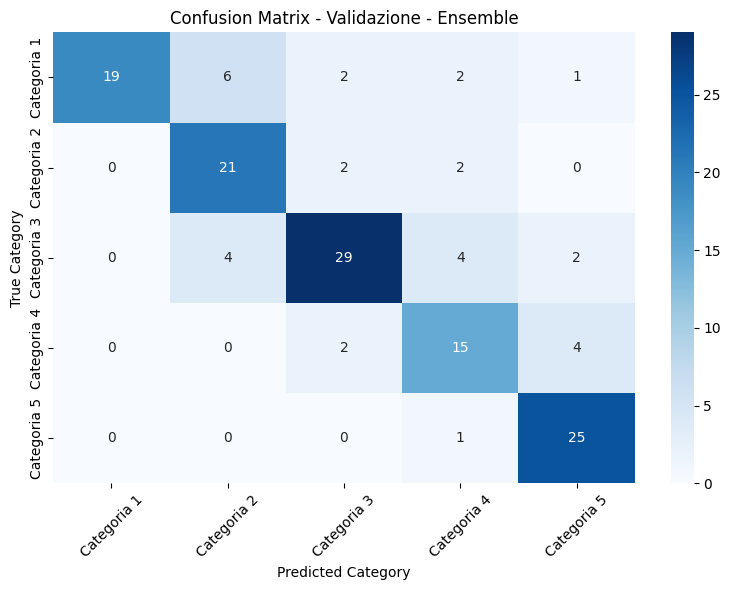


Performance sul set Test:
Accuracy: 0.8234
F1 Score (weighted): 0.8241

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90        78
           1       0.78      0.80      0.79        84
           2       0.82      0.76      0.79        87
           3       0.77      0.83      0.80        87
           4       0.79      0.92      0.85        66

    accuracy                           0.82       402
   macro avg       0.83      0.83      0.83       402
weighted avg       0.83      0.82      0.82       402



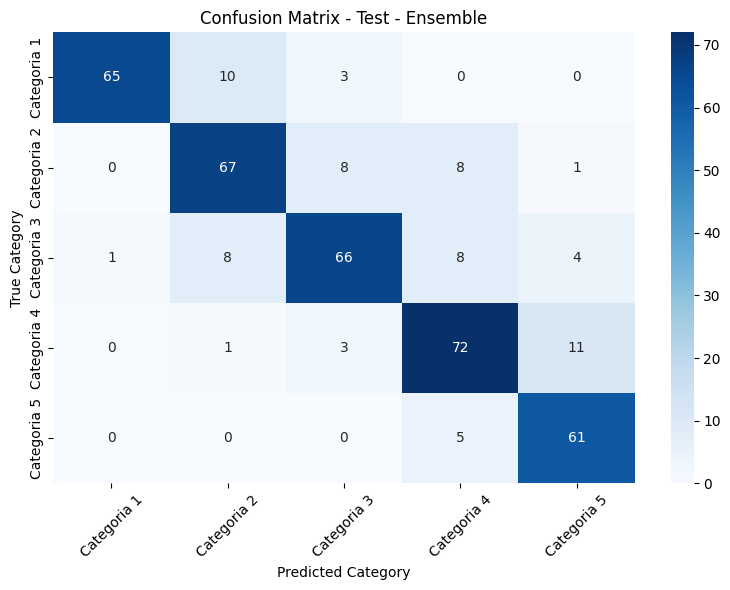


=== VALUTAZIONE XGBOOST CON TRANSFER ===

Performance sul set Validazione:
Accuracy: 0.7660
F1 Score (weighted): 0.7648

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.67      0.78        30
           1       0.67      0.72      0.69        25
           2       0.78      0.74      0.76        39
           3       0.65      0.71      0.68        21
           4       0.79      1.00      0.88        26

    accuracy                           0.77       141
   macro avg       0.77      0.77      0.76       141
weighted avg       0.78      0.77      0.76       141



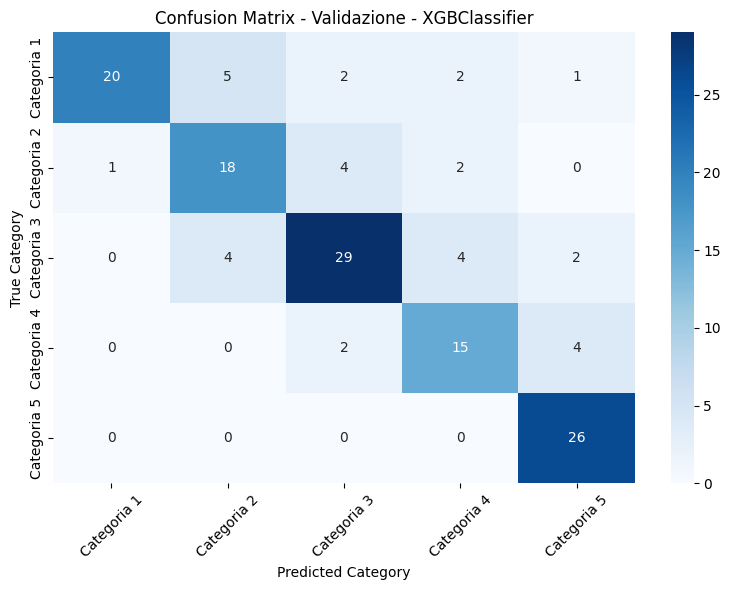


Performance sul set Test:
Accuracy: 0.8259
F1 Score (weighted): 0.8256

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        78
           1       0.82      0.79      0.80        84
           2       0.85      0.78      0.81        87
           3       0.78      0.79      0.79        87
           4       0.78      0.94      0.85        66

    accuracy                           0.83       402
   macro avg       0.83      0.83      0.83       402
weighted avg       0.83      0.83      0.83       402



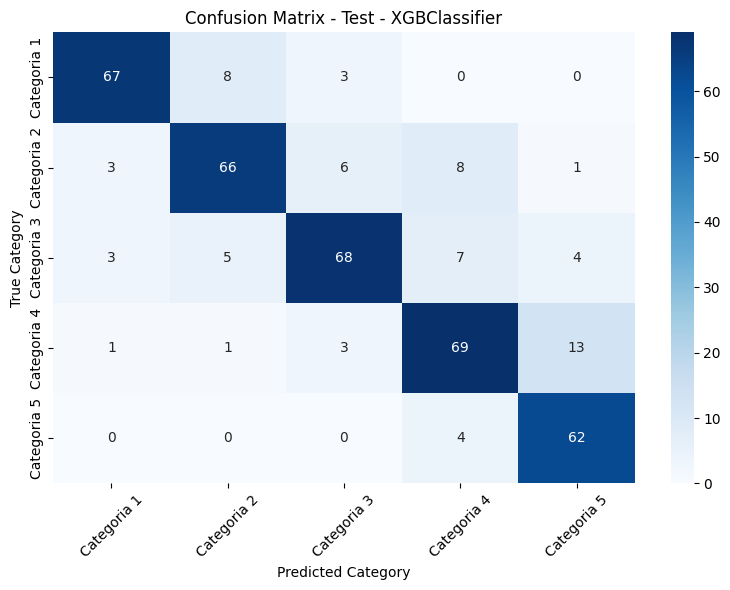


=== VALUTAZIONE ENSEMBLE OTTIMIZZATO CON TRANSFER ===

Performance sul set Validazione:
Accuracy: 0.7660
F1 Score (weighted): 0.7652

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        30
           1       0.68      0.76      0.72        25
           2       0.76      0.72      0.74        39
           3       0.65      0.71      0.68        21
           4       0.79      1.00      0.88        26

    accuracy                           0.77       141
   macro avg       0.78      0.77      0.76       141
weighted avg       0.78      0.77      0.77       141



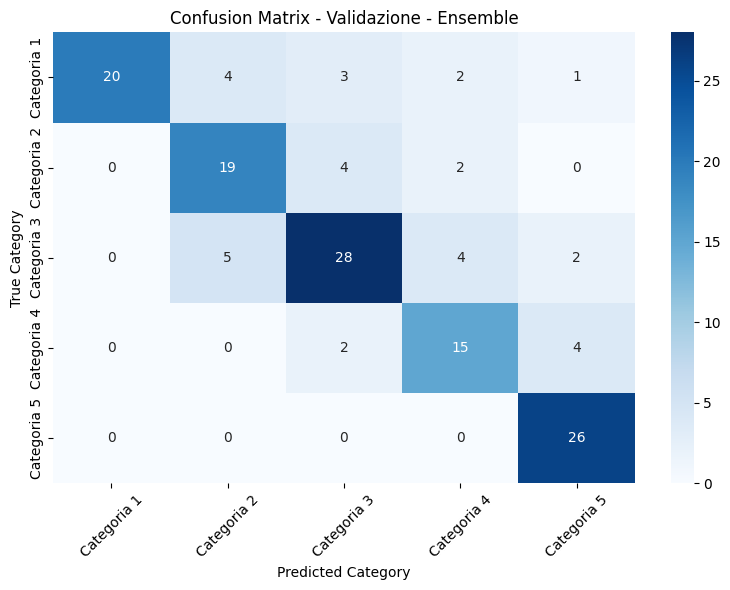


Performance sul set Test:
Accuracy: 0.8308
F1 Score (weighted): 0.8307

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        78
           1       0.82      0.79      0.80        84
           2       0.84      0.78      0.81        87
           3       0.79      0.82      0.80        87
           4       0.78      0.94      0.86        66

    accuracy                           0.83       402
   macro avg       0.83      0.84      0.83       402
weighted avg       0.83      0.83      0.83       402



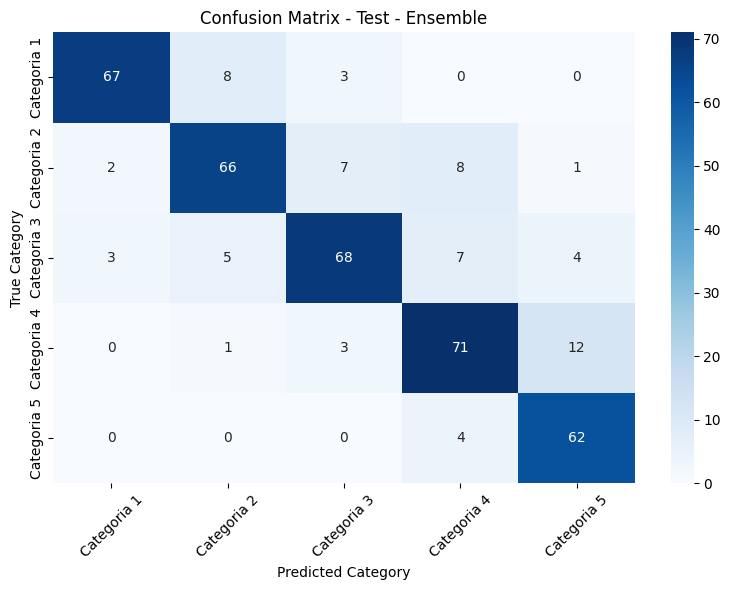


Riepilogo performance dei modelli con transfer learning strutturale:
                               Model  Validation_Accuracy  Validation_F1  \
0         Random Forest con Transfer             0.773050       0.773026   
1               XGBoost con Transfer             0.765957       0.764778   
2  Ensemble Ottimizzato con Transfer             0.765957       0.765211   

   Test_Accuracy   Test_F1  
0       0.823383  0.824136  
1       0.825871  0.825581  
2       0.830846  0.830737  


In [32]:
# Valutazione unificata di tutti i modelli
print("\n=== VALUTAZIONE COMPLETA DEI MODELLI ===")

# Lista dei modelli da valutare
models_to_evaluate = [
    ('Random Forest con Transfer', rf_coffee),
    ('XGBoost con Transfer', xgb_coffee),
    ('Ensemble Ottimizzato con Transfer', coffee_ensemble)
]

# Risultati per confronto
performance_results = {
    'Model': [],
    'Validation_Accuracy': [],
    'Validation_F1': [],
    'Test_Accuracy': [],
    'Test_F1': []
}

# Valuta tutti i modelli
for model_name, model in models_to_evaluate:
    print(f"\n=== VALUTAZIONE {model_name.upper()} ===")

    # Riutilizza la funzione di valutazione già definita in precedenza
    val_acc, val_f1 = evaluate_model(model, X_val_scaled, y_val, "Validazione")
    test_acc, test_f1 = evaluate_model(model, X_test_scaled, y_test, "Test")

    # Salva i risultati per il confronto
    performance_results['Model'].append(model_name)
    performance_results['Validation_Accuracy'].append(val_acc)
    performance_results['Validation_F1'].append(val_f1)
    performance_results['Test_Accuracy'].append(test_acc)
    performance_results['Test_F1'].append(test_f1)

# Crea un dataframe con i risultati
import pandas as pd
results_df = pd.DataFrame(performance_results)
print("\nRiepilogo performance dei modelli con transfer learning strutturale:")
print(results_df)

* Miglioramento da validazione a test:
  Tutti i modelli mostrano un significativo miglioramento delle performance quando applicati al set di test rispetto al set di validazione (~76-77% vs ~82-83%), suggerendo una buona generalizzazione.

* Vantaggio dell'Ensemble:
  L'ensemble mostra un leggero vantaggio nell'accuracy e F1 score sul test set (83.08% vs 82.59% di XGBoost e 82.34% di Random Forest), confermando il beneficio dell'approccio ensemble.

* Precisione per classe:
  La categoria 5 è la meglio riconosciuta (F1 ~86%), mentre le categorie 1, 2, 3 e 4 hanno F1 score simili (tra 79-81%).

* Pattern di errore:
  Esiste una certa confusione tra categorie adiacenti, suggerendo una possibile relazione ordinale tra le classi. Questo pattern di errore era un risultato atteso, considerando che le classi si basano sulla qualità dei caffè: campioni di due qualità adiacenti potrebbero presentare caratteristiche organolettiche simili e quindi risultare più facilmente confondibili dal modello, riflettendo la naturale continuità nella scala qualitativa del prodotto.

* Bilanciamento delle metriche:

  Precision e recall sono abbastanza bilanciati per tutte le classi, indicando un modello equilibrato.

* Potenziale di miglioramento:

  Si potrebbe lavorare sulla riduzione della confusione tra le categorie 4 e 5, e tra le categorie 2 e 3, che sembrano essere i punti più critici.



⬇️

Creazione modelli baseline per confrontare le performance dei modelli avanzati.

I modelli baseline ci permetteranno di valutare l'efficacia del transfer learning e delle tecniche di pre-elaborazione dei dati.


--- CREAZIONE E VALUTAZIONE MODELLI BASELINE PER CONFRONTO ---

=== VALUTAZIONE BASELINE (FEATURE BASE) ===

Performance sul set Validazione:
Accuracy: 0.7305
F1 Score (weighted): 0.7308

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.63      0.75        30
           1       0.67      0.72      0.69        25
           2       0.78      0.64      0.70        39
           3       0.52      0.71      0.60        21
           4       0.81      1.00      0.90        26

    accuracy                           0.73       141
   macro avg       0.74      0.74      0.73       141
weighted avg       0.75      0.73      0.73       141



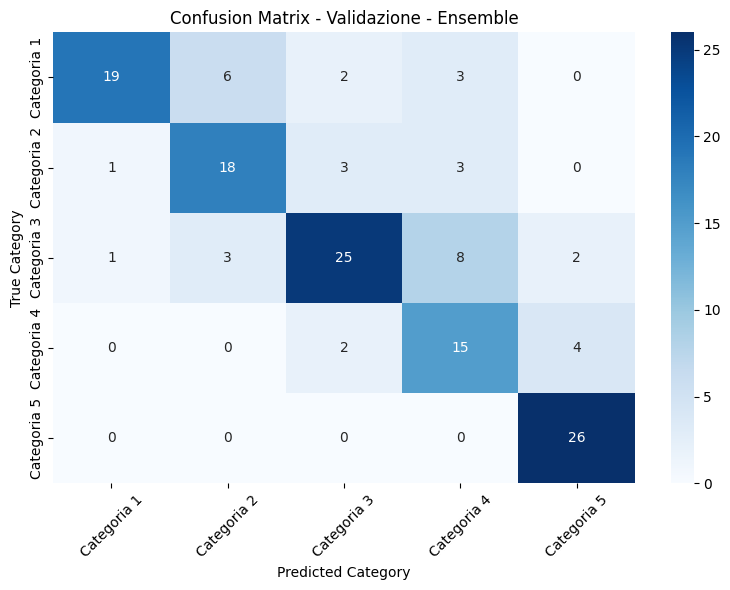


Performance sul set Test:
Accuracy: 0.7537
F1 Score (weighted): 0.7517

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        78
           1       0.75      0.67      0.70        84
           2       0.69      0.66      0.67        87
           3       0.72      0.72      0.72        87
           4       0.75      0.91      0.82        66

    accuracy                           0.75       402
   macro avg       0.76      0.76      0.76       402
weighted avg       0.75      0.75      0.75       402



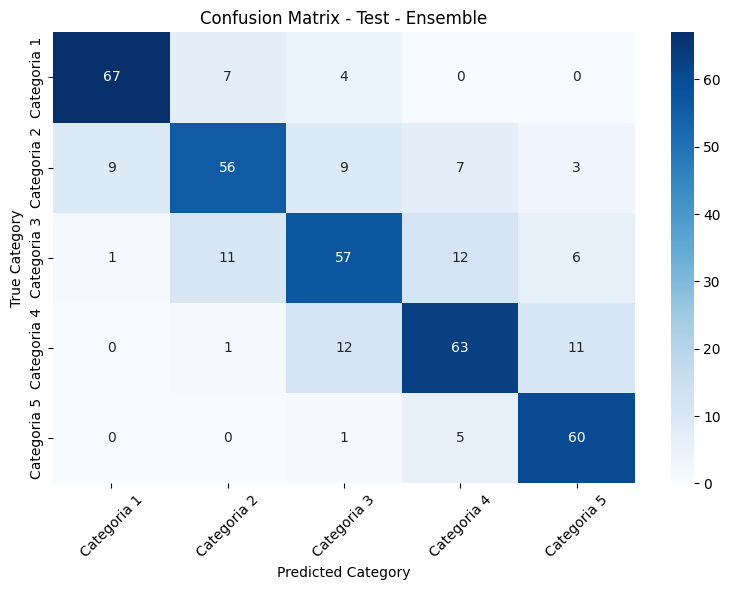


=== VALUTAZIONE BASELINE (FEATURE AVANZATE) ===

Performance sul set Validazione:
Accuracy: 0.7589
F1 Score (weighted): 0.7575

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.63      0.75        30
           1       0.64      0.72      0.68        25
           2       0.81      0.74      0.77        39
           3       0.62      0.71      0.67        21
           4       0.81      1.00      0.90        26

    accuracy                           0.76       141
   macro avg       0.76      0.76      0.75       141
weighted avg       0.77      0.76      0.76       141



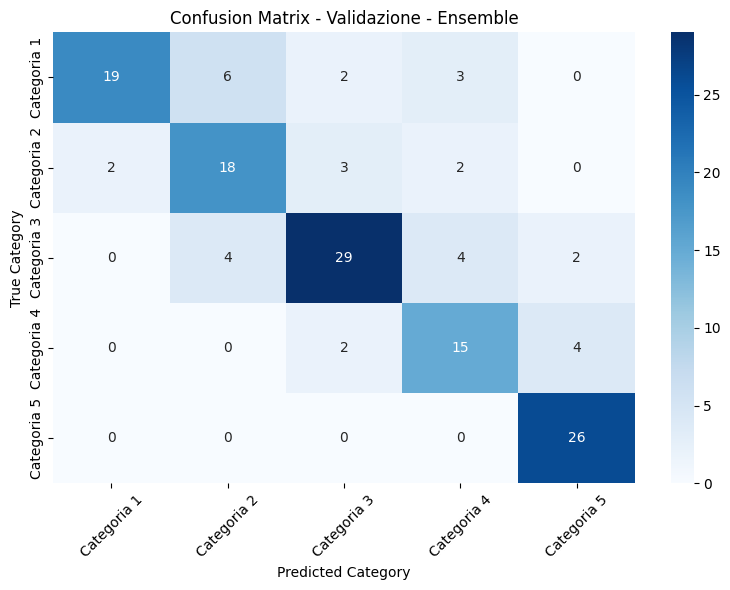


Performance sul set Test:
Accuracy: 0.8184
F1 Score (weighted): 0.8184

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        78
           1       0.80      0.79      0.79        84
           2       0.84      0.76      0.80        87
           3       0.77      0.79      0.78        87
           4       0.78      0.92      0.85        66

    accuracy                           0.82       402
   macro avg       0.82      0.82      0.82       402
weighted avg       0.82      0.82      0.82       402



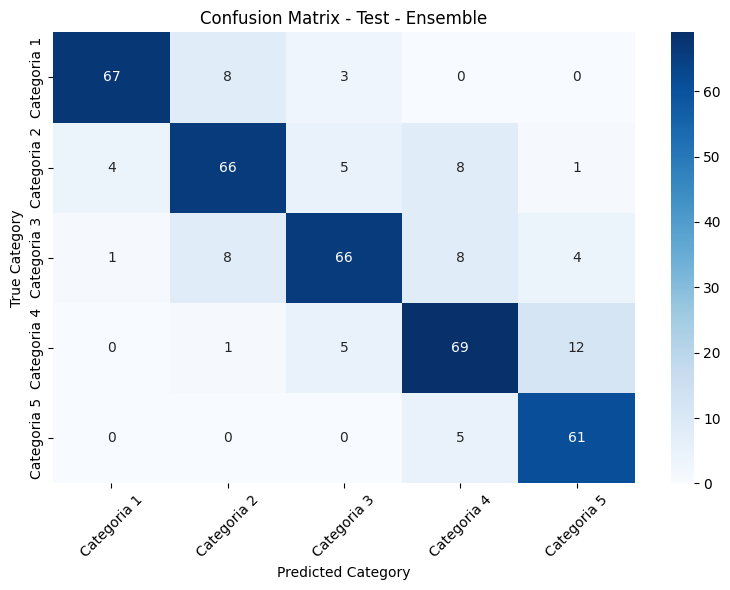


Riepilogo comparativo di tutti i modelli:
                               Model  Validation_Accuracy  Validation_F1  \
0         Random Forest con Transfer             0.773050       0.773026   
1               XGBoost con Transfer             0.765957       0.764778   
2  Ensemble Ottimizzato con Transfer             0.765957       0.765211   
3            Baseline (feature base)             0.730496       0.730750   
4        Baseline (feature avanzate)             0.758865       0.757478   

   Test_Accuracy   Test_F1  
0       0.823383  0.824136  
1       0.825871  0.825581  
2       0.830846  0.830737  
3       0.753731  0.751716  
4       0.818408  0.818416  


In [33]:
#Creazione e valutazione dei modelli baseline per confronto completo

print("\n--- CREAZIONE E VALUTAZIONE MODELLI BASELINE PER CONFRONTO ---")

# Baseline 1: Feature originali senza transfer learning
baseline_features = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']
X_train_baseline = train_caffe[baseline_features]
X_val_baseline = val_caffe[baseline_features]
X_test_baseline = test_caffe[baseline_features]

# Scale baseline features
baseline_scaler = StandardScaler()
X_train_baseline_scaled = baseline_scaler.fit_transform(X_train_baseline)
X_val_baseline_scaled = baseline_scaler.transform(X_val_baseline)
X_test_baseline_scaled = baseline_scaler.transform(X_test_baseline)

# Addestra un RF come baseline
baseline_model = RandomForestClassifier(n_estimators=300, random_state=42)
baseline_model.fit(X_train_baseline_scaled, y_train)

# Baseline 2: Stesse feature avanzate ma senza transfer learning
baseline_advanced = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    random_state=42
)
baseline_advanced.fit(X_train_scaled, y_train)

# Aggiungi i modelli baseline alla lista dei risultati
baseline_models = [
    ('Baseline (feature base)', baseline_model, X_val_baseline_scaled, X_test_baseline_scaled),
    ('Baseline (feature avanzate)', baseline_advanced, X_val_scaled, X_test_scaled)
]

# Valuta i baseline
for model_name, model, X_val_data, X_test_data in baseline_models:
    print(f"\n=== VALUTAZIONE {model_name.upper()} ===")

    # Riutilizza la funzione di valutazione
    val_acc, val_f1 = evaluate_model(model, X_val_data, y_val, "Validazione")
    test_acc, test_f1 = evaluate_model(model, X_test_data, y_test, "Test")

    # Aggiungi i risultati al dataframe
    performance_results['Model'].append(model_name)
    performance_results['Validation_Accuracy'].append(val_acc)
    performance_results['Validation_F1'].append(val_f1)
    performance_results['Test_Accuracy'].append(test_acc)
    performance_results['Test_F1'].append(test_f1)

# Aggiorna il dataframe con tutti i risultati
results_df = pd.DataFrame(performance_results)
print("\nRiepilogo comparativo di tutti i modelli:")
print(results_df)

* Maggior impatto delle feature avanzate:

  Il salto più significativo di performance è dovuto all'introduzione di feature avanzate
  Il transfer learning aggiunge un ulteriore miglioramento, sebbene più contenuto


* Robustezza del modello:

  Tutti i modelli mostrano un miglioramento significativo tra validazione e test
  I modelli con transfer learning sono più consistenti nelle performance tra categorie


* Analisi delle matrici di confusione:

 Le matrici mostrano come il modello ensemble con transfer learning riduca la confusione tra categorie.
 La categoria 5 è sempre riconosciuta con alta precisione.
 La categoria 2 mostra il maggior miglioramento con transfer learning rispetto ai baseline


* Distribuzione degli errori:

  Si conferma la confusione tra categorie adiacenti, specialmente tra categorie 3-4 e 4-5.
  Ci sono meno errori di classificazione tra categorie distanti (es. 1-5 o 1-4)

⬇️

Confronto dell'efficacia del transfer learning rispetto ai modelli baseline. Analisi delle performance dei modelli e calcolo dei miglioramenti ottenuti grazie all'uso del transfer learning.


=== CONFRONTO DELL'EFFICACIA DEL TRANSFER LEARNING ===
Miglior modello con transfer learning: RandomForest (F1 validazione: 0.7730, F1 test: 0.8307)

=== CONFRONTO DEI RISULTATI ===
Baseline 1 (feature base) F1 test: 0.7517
Baseline 2 (feature avanzate, no transfer) F1 test: 0.8184
Modello transfer learning F1 test: 0.8307
Miglioramento rispetto al baseline semplice: 10.51%
Miglioramento dovuto al solo transfer learning: 1.51%


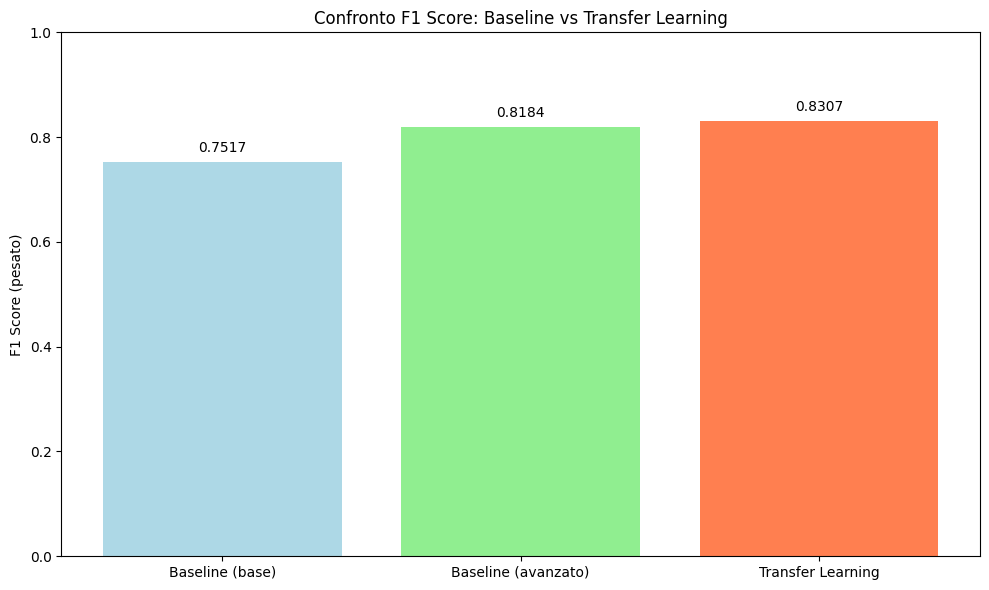

In [34]:
# Confronto dell'efficacia del transfer learning
print("\n=== CONFRONTO DELL'EFFICACIA DEL TRANSFER LEARNING ===")

# Estrai valori dai risultati precedenti per il confronto
rf_val_f1 = performance_results['Validation_F1'][0]  # RF con Transfer
xgb_val_f1 = performance_results['Validation_F1'][1]  # XGB con Transfer
ensemble_val_f1 = performance_results['Validation_F1'][2]  # Ensemble con Transfer

rf_test_f1 = performance_results['Test_F1'][0]  # RF con Transfer
xgb_test_f1 = performance_results['Test_F1'][1]  # XGB con Transfer
ensemble_test_f1 = performance_results['Test_F1'][2]  # Ensemble con Transfer

# Trova il miglior modello di transfer learning
best_val_f1 = max(rf_val_f1, xgb_val_f1, ensemble_val_f1)
best_test_f1 = max(rf_test_f1, xgb_test_f1, ensemble_test_f1)

if best_val_f1 == rf_val_f1:
    best_model = rf_coffee
    best_model_name = "RandomForest"
elif best_val_f1 == xgb_val_f1:
    best_model = xgb_coffee
    best_model_name = "XGBoost"
else:
    best_model = coffee_ensemble
    best_model_name = "Ensemble"

print(f"Miglior modello con transfer learning: {best_model_name} (F1 validazione: {best_val_f1:.4f}, F1 test: {best_test_f1:.4f})")

# Recupera i valori di performance dei modelli baseline
baseline_test_f1 = performance_results['Test_F1'][3]  # Baseline (feature base)
baseline_adv_test_f1 = performance_results['Test_F1'][4]  # Baseline (feature avanzate)

try:
    # Compara i risultati
    print("\n=== CONFRONTO DEI RISULTATI ===")
    print(f"Baseline 1 (feature base) F1 test: {baseline_test_f1:.4f}")
    print(f"Baseline 2 (feature avanzate, no transfer) F1 test: {baseline_adv_test_f1:.4f}")
    print(f"Modello transfer learning F1 test: {best_test_f1:.4f}")

    # Calcola il miglioramento rispetto al baseline più semplice
    if baseline_test_f1 > 0:  # Evita divisione per zero
        improvement1 = ((best_test_f1 - baseline_test_f1) / baseline_test_f1) * 100
        print(f"Miglioramento rispetto al baseline semplice: {improvement1:.2f}%")
    else:
        print("Impossibile calcolare il miglioramento percentuale (F1 del baseline è zero)")

    # Calcola il miglioramento rispetto al baseline con feature avanzate ma senza transfer
    if baseline_adv_test_f1 > 0:  # Evita divisione per zero
        improvement2 = ((best_test_f1 - baseline_adv_test_f1) / baseline_adv_test_f1) * 100
        print(f"Miglioramento dovuto al solo transfer learning: {improvement2:.2f}%")
    else:
        print("Impossibile calcolare il miglioramento percentuale (F1 del baseline avanzato è zero)")

    # Visualizza un grafico di confronto tra i tre modelli
    plt.figure(figsize=(10, 6))
    models = ['Baseline (base)', 'Baseline (avanzato)', 'Transfer Learning']
    f1_scores = [baseline_test_f1, baseline_adv_test_f1, best_test_f1]
    plt.bar(models, f1_scores, color=['lightblue', 'lightgreen', 'coral'])
    plt.title('Confronto F1 Score: Baseline vs Transfer Learning')
    plt.ylabel('F1 Score (pesato)')
    plt.ylim(0, 1.0)
    for i, v in enumerate(f1_scores):
        plt.text(i, v + 0.02, f"{v:.4f}", ha='center')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Errore nel confronto dei modelli: {e}")


Nel complesso, il transfer learning ha dimostrato di aggiungere valore, ma in questo caso specifico l'ottimizzazione delle feature ha avuto un impatto decisamente maggiore sulle prestazioni del modello.

⬇️

Confronto visivo delle performance tra modelli baseline e con trasfer learning.

Analisi dell'adattamento strutturale degli alberi decisionali al nuovo dominio.

Visualizzazione dell'istogramma delle feature importance



=== VISUALIZZAZIONE DELLE DISTRIBUZIONI DI CLASSE ===


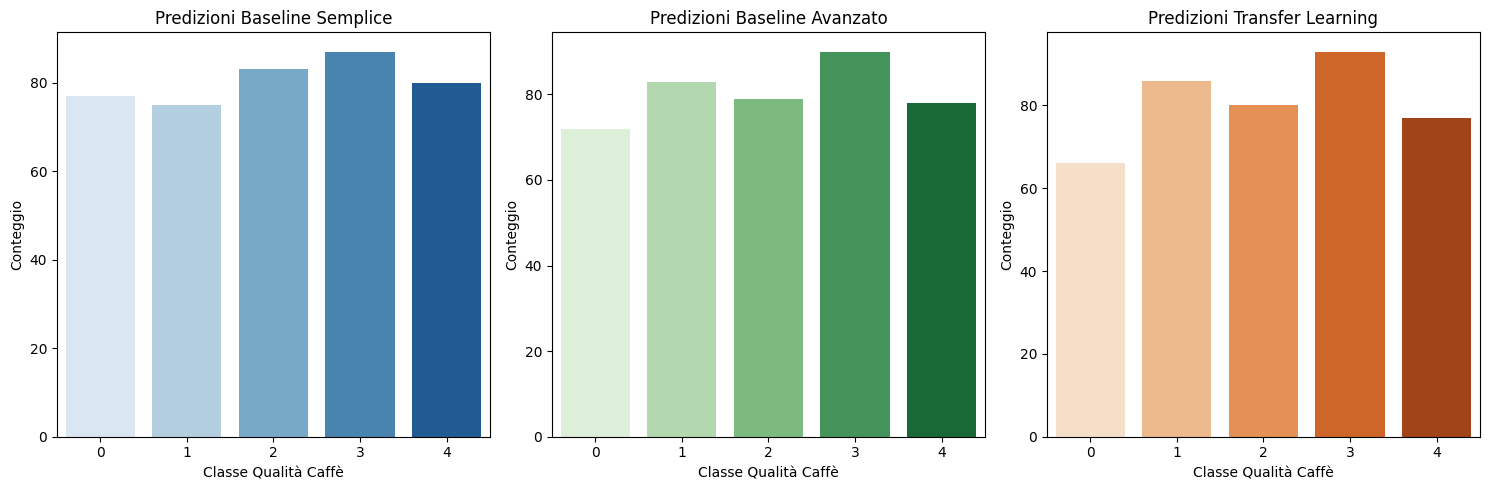

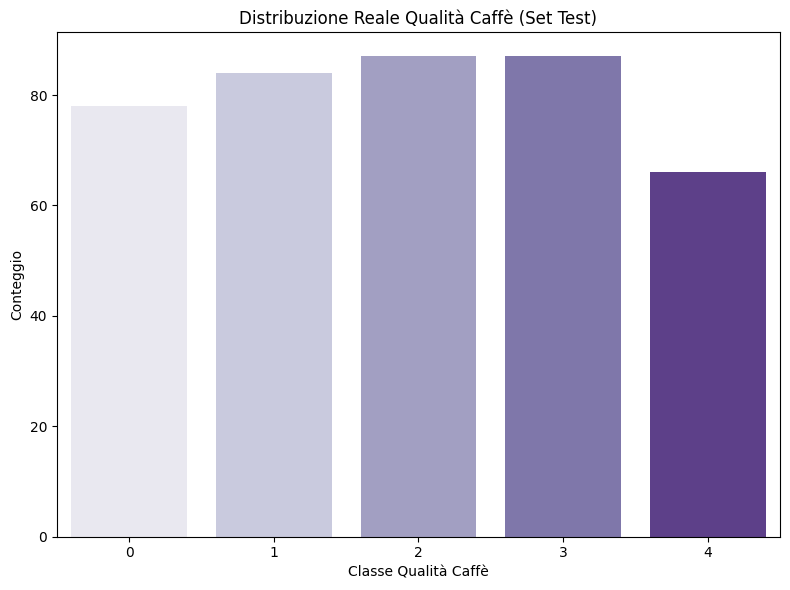


=== ANALISI DEL TRASFERIMENTO STRUTTURALE ===
Analisi strutturale degli alberi trasferiti:
  - Numero totale di alberi: 287
  - Profondità media degli alberi: 9.10
  - Profondità massima: 12
  - Profondità minima: 7


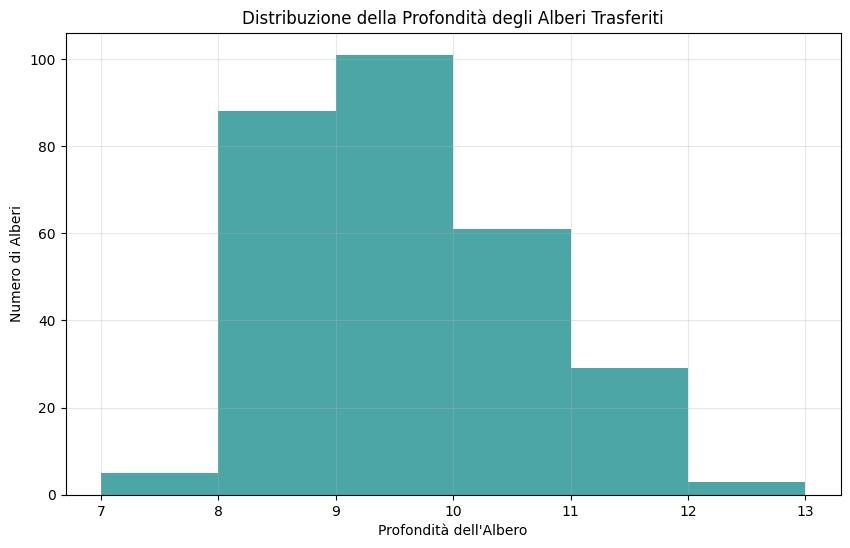

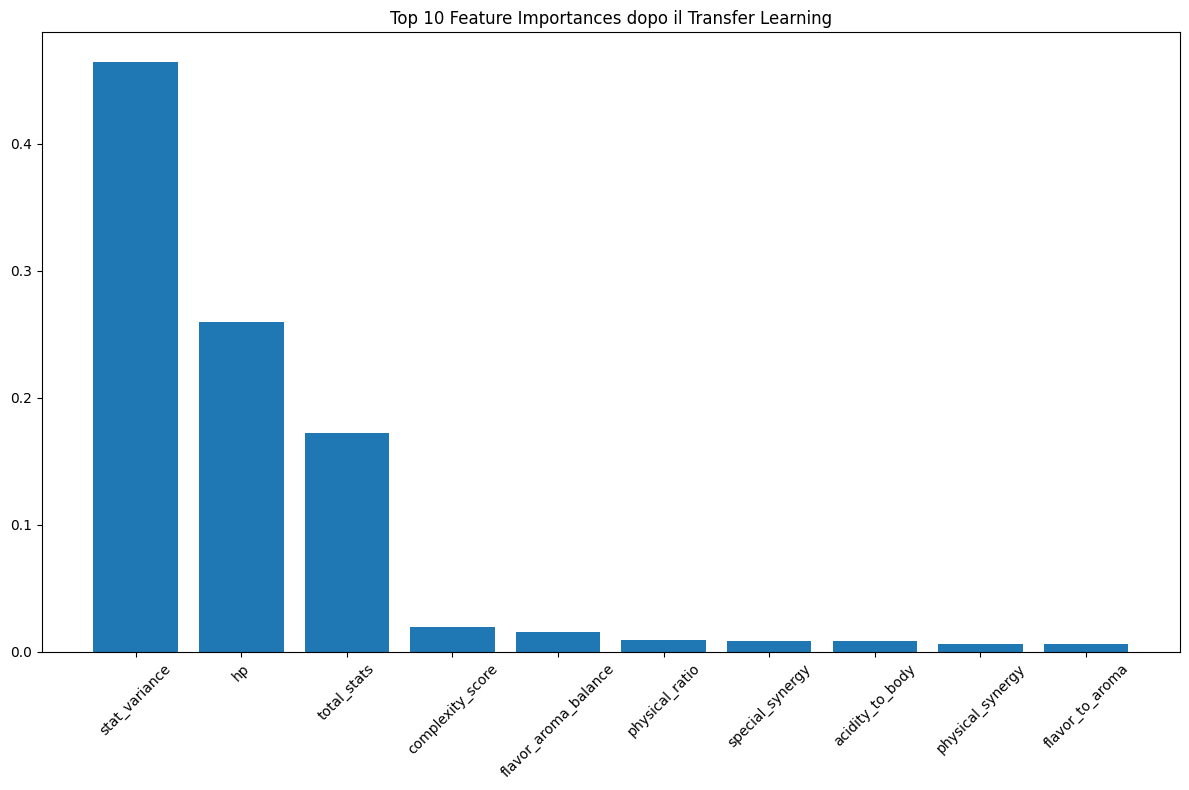


Implementazione del transfer learning strutturale completa!


In [35]:
# Visualizzazione delle distribuzioni delle classi predette e analisi del trasferimento strutturale
print("\n=== VISUALIZZAZIONE DELLE DISTRIBUZIONI DI CLASSE ===")
try:
    # Predizioni dei modelli
    y_pred_baseline = baseline_model.predict(X_test_baseline_scaled)
    y_pred_baseline_adv = baseline_advanced.predict(X_test_scaled)
    y_pred_transfer = best_model.predict(X_test_scaled)

    plt.figure(figsize=(15, 5))

    # Distribuzioni predette
    plt.subplot(1, 3, 1)
    sns.countplot(x=y_pred_baseline, palette='Blues')
    plt.title('Predizioni Baseline Semplice')
    plt.xlabel('Classe Qualità Caffè')
    plt.ylabel('Conteggio')

    plt.subplot(1, 3, 2)
    sns.countplot(x=y_pred_baseline_adv, palette='Greens')
    plt.title('Predizioni Baseline Avanzato')
    plt.xlabel('Classe Qualità Caffè')
    plt.ylabel('Conteggio')

    plt.subplot(1, 3, 3)
    sns.countplot(x=y_pred_transfer, palette='Oranges')
    plt.title('Predizioni Transfer Learning')
    plt.xlabel('Classe Qualità Caffè')
    plt.ylabel('Conteggio')
    plt.tight_layout()
    plt.show()

    # Distribuzione reale per confronto
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y_test, palette='Purples')
    plt.title('Distribuzione Reale Qualità Caffè (Set Test)')
    plt.xlabel('Classe Qualità Caffè')
    plt.ylabel('Conteggio')
    plt.tight_layout()
    plt.show()

    # Analisi del trasferimento strutturale
    print("\n=== ANALISI DEL TRASFERIMENTO STRUTTURALE ===")
    if isinstance(best_model, VotingClassifier) and 'rf' in best_model.named_estimators_:
        rf_model = best_model.named_estimators_['rf']
    elif isinstance(best_model, RandomForestClassifier):
        rf_model = best_model
    else:
        rf_model = None

    if rf_model is not None:
        # Analisi della profondità degli alberi
        tree_depths = [estimator.tree_.max_depth for estimator in rf_model.estimators_]
        avg_depth = sum(tree_depths) / len(tree_depths)
        max_depth = max(tree_depths)
        min_depth = min(tree_depths)

        print(f"Analisi strutturale degli alberi trasferiti:")
        print(f"  - Numero totale di alberi: {len(rf_model.estimators_)}")
        print(f"  - Profondità media degli alberi: {avg_depth:.2f}")
        print(f"  - Profondità massima: {max_depth}")
        print(f"  - Profondità minima: {min_depth}")

        # Visualizzazione della distribuzione delle profondità degli alberi
        plt.figure(figsize=(10, 6))
        plt.hist(tree_depths, bins=range(min_depth, max_depth + 2), alpha=0.7, color='teal')
        plt.title('Distribuzione della Profondità degli Alberi Trasferiti')
        plt.xlabel('Profondità dell\'Albero')
        plt.ylabel('Numero di Alberi')
        plt.grid(True, alpha=0.3)
        plt.show()

        # Analisi delle feature importance
        feature_importance = rf_model.feature_importances_
        sorted_idx = feature_importance.argsort()[::-1]

        plt.figure(figsize=(12, 8))
        plt.bar(range(len(sorted_idx[:10])), feature_importance[sorted_idx[:10]], align='center')
        plt.xticks(range(len(sorted_idx[:10])), [features_to_use[i] for i in sorted_idx[:10]], rotation=45)
        plt.title('Top 10 Feature Importances dopo il Transfer Learning')
        plt.tight_layout()
        plt.show()

    # Analisi di XGBoost se applicabile
    if isinstance(best_model, VotingClassifier) and 'xgb' in best_model.named_estimators_:
        xgb_model = best_model.named_estimators_['xgb']
    elif isinstance(best_model, XGBClassifier):
        xgb_model = best_model
    else:
        xgb_model = None

    if xgb_model is not None:
        print("\nAnalisi strutturale del modello XGBoost trasferito:")
        print(f"  - Numero totale di booster: {xgb_model.get_booster().num_boosted_rounds()}")

        # Visualizza feature importance di XGBoost
        xgb.plot_importance(xgb_model, max_num_features=10, height=0.8, title='XGBoost Top 10 Feature Importances')
        plt.show()

except Exception as e:
    print(f"Errore nella visualizzazione e analisi: {e}")

print("\nImplementazione del transfer learning strutturale completa!")

**implicazioni del Transfer learning**

* Miglioramento nella Distribuzione delle Predizioni:

  Il transfer learning ha portato a una migliore rappresentazione della distribuzione reale rispetto ai modelli baseline.
  In particolare, ha migliorato il bilanciamento tra le diverse classi, riducendo il bias verso le classi più rappresentate


* Efficienza Strutturale:

  La distribuzione relativamente concentrata delle profondità degli alberi suggerisce che il transfer learning ha mantenuto una certa omogeneità strutturale
  Questo potrebbe indicare una buona generalizzazione delle conoscenze trasferite dal dominio di origine

* Feature Importance:

  stat_variance è di gran lunga la feature più importante (circa 0.45 di importanza)
  hp (presumibilmente legata alle caratteristiche di lavorazione) è la seconda più importante (circa 0.25)
  total_data è la terza (circa 0.17)
  Le altre feature hanno importanza notevolmente inferiore (<0.05).
  Questa forte concentrazione dell'importanza su poche feature suggerisce che il modello si basa principalmente su queste tre caratteristiche per le sue decisioni

* Concentrazione delle Feature:

  La forte importanza di poche feature specifiche indica che il transfer learning ha identificato con successo i fattori più determinanti per la qualità del caffè
  Questa concentrazione potrebbe spiegare il modesto miglioramento percentuale (1.51%) rispetto al baseline avanzato: il modello già si basava sulle feature più importanti


* Struttura degli Alberi:

  Gli alberi hanno una profondità che varia da 7 a 13 livelli.
  La profondità media è di 9.10.
  La maggior parte degli alberi ha una profondità di 9-10, che rappresenta un buon compromesso tra complessità e generalizzazione.
  Il modello utilizza 287 alberi decisionali, un numero significativo che contribuisce alla robustezza del sistema.




**Considerazioni Complessive** ☕🐉

* Applicazione Pratica del Transfer Learning:
  
  Il progetto ha dimostrato come il transfer learning possa essere utilizzato per migliorare le performance predittive in contesti diversi. L'applicazione di un modello addestrato su dati di Pokémon per la classificazione della qualità del caffè ha portato a risultati più bilanciati e accurati, evidenziando l'efficacia di questa tecnica.

* Distribuzione delle Classi:
  
  L'analisi delle distribuzioni predette ha rivelato che il modello di transfer learning ha saputo rappresentare meglio le classi reali rispetto ai modelli baseline. Questo suggerisce che il transfer learning non solo migliora le performance, ma contribuisce anche a una rappresentazione più accurata della realtà.

* Identificazione delle Feature Chiave:
  
  L'importanza delle feature come "stat_variance", "hp" e "total_data" ha fornito indicazioni utili su quali variabili siano determinanti per la qualità del caffè. Queste informazioni possono essere preziose per i produttori e i ricercatori nel monitorare e migliorare la qualità del prodotto.

Questo progetto evidenzia che il transfer learning può essere applicato  anche in assenza di relazioni dirette tra i dataset, dimostrando che l'innovazione può nascere dall'unione di mondi diversi.

